# 1. Load dataset

#### In this assignment, you will use a student exams results dataset (exams.csv). It is a collection of exam scores and a binary value indicating whether the student has passed the course. You will need to read the data from data file (exams.csv). It contains three columns. First two columns (exam_1, exam_2) are exam scores of a student and the third value indicates whether the student has passed the course or not (1 or 0).
#### It is recommended to normalize the data at this stage. Gradient descent algorithm performs much better when the data is normalized. Use min-max normalization.

In [270]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [271]:
df = pd.read_csv("C:/Users/ACER/Downloads/exams.csv")
df

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [272]:
#min-max normalization 
df["exam_1"]=(df["exam_1"]-df["exam_1"].min())/(df["exam_1"].max()-df["exam_1"].min())
df["exam_2"]=(df["exam_2"]-df["exam_2"].min())/(df["exam_2"].max()-df["exam_2"].min())
df

,exam_1,exam_2,admitted
0,0.065428,0.694655,0
1,0.003266,0.194705,0
2,0.082968,0.619618,0
3,0.431764,0.816001,1
4,0.701943,0.655392,1
...,...,...,...
95,0.765817,0.260407,1
96,0.174904,0.827651,1
97,0.992649,0.559166,1
98,0.362356,0.502865,1


In [273]:
df.isnull().sum()

exam_1      0
exam_2      0
admitted    0
dtype: int64

In [274]:
df.describe()

,exam_1,exam_2,admitted
count,100.000000,100.000000,100.000000
mean,0.510046,0.521763,0.600000
std,0.278895,0.272211,0.492366
min,0.000000,0.000000,0.000000
25%,0.298996,0.257462,0.000000
50%,0.529951,0.543155,1.000000
75%,0.718853,0.714224,1.000000
max,1.000000,1.000000,1.000000


# 2. Visualize

In [275]:
x = df.iloc[:,:-1]
y = df.iloc[:,2]

In [276]:
x.iloc[:,0]

0     0.065428
1     0.003266
2     0.082968
3     0.431764
4     0.701943
        ...   
95    0.765817
96    0.174904
97    0.992649
98    0.362356
99    0.640930
Name: exam_1, Length: 100, dtype: float64

#### Plot a graph of first exam score vs second exam score. Admitted student points should be green and failed student points should be red. It should look similar to the one below.
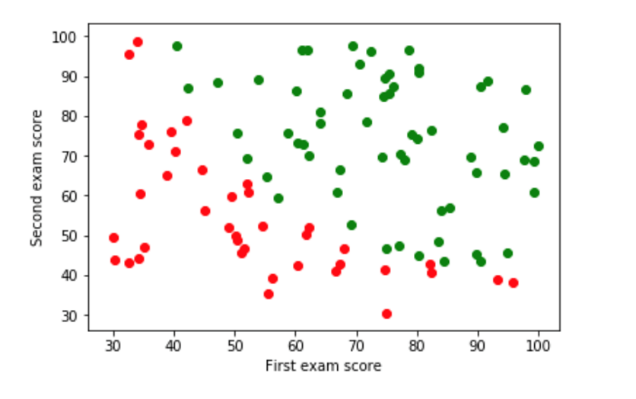

In [277]:
x.iloc[:,0][mask].values

array([0.43176427, 0.7019434 , 0.44500891, 0.64449684, 0.65989108,
       0.77934283, 0.74887421, 0.56336978, 0.34273413, 0.55914951,
       0.58195856, 0.67250409, 0.85450448, 0.68605319, 0.46169753,
       0.71853306, 0.44891644, 0.7932702 , 0.31513382, 0.48901588,
       0.77174023, 0.92282407, 0.67557495, 0.97052763, 0.45886031,
       0.88156804, 0.71501627, 0.99204044, 0.86697331, 0.96872217,
       0.63337365, 0.59822584, 0.64981247, 0.14904504, 0.71981433,
       0.52584783, 0.48704268, 0.60610945, 0.43570996, 0.4125345 ,
       1.        , 0.24660577, 0.29238382, 0.84357013, 0.92843027,
       0.53405404, 0.38956944, 0.72106391, 0.55052645, 0.65098907,
       0.69624872, 0.91782133, 0.86556634, 0.63687092, 0.8569272 ,
       0.76581739, 0.17490393, 0.99264933, 0.36235552, 0.64093004])

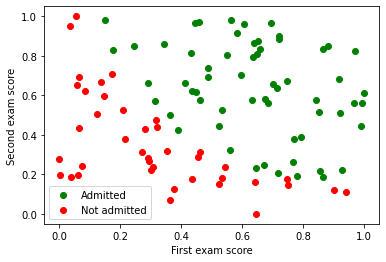

In [278]:
mask = y == 1
adm = plt.scatter(x.iloc[:,0][mask].values, x.iloc[:,1][mask].values,color='green')
not_adm = plt.scatter(x.iloc[:,0][~mask].values, x.iloc[:,1][~mask].values,color='red')
plt.xlabel('First exam score')
plt.ylabel('Second exam score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

# 3. Logistic Regression

#### Implement Logistic Regression from scratch (using numpy)
a) Implement a function which returns sigmoid of a value given the value.

In [279]:
x

,exam_1,exam_2
0,0.065428,0.694655
1,0.003266,0.194705
2,0.082968,0.619618
3,0.431764,0.816001
4,0.701943,0.655392
...,...,...
95,0.765817,0.260407
96,0.174904,0.827651
97,0.992649,0.559166
98,0.362356,0.502865


In [317]:
y=df.admitted.values

In [324]:
y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [281]:
ones_col = np.ones(len(x))
ones_col

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [282]:
x["ones"] = ones_col.tolist()
x

,exam_1,exam_2,ones
0,0.065428,0.694655,1.0
1,0.003266,0.194705,1.0
2,0.082968,0.619618,1.0
3,0.431764,0.816001,1.0
4,0.701943,0.655392,1.0
...,...,...,...
95,0.765817,0.260407,1.0
96,0.174904,0.827651,1.0
97,0.992649,0.559166,1.0
98,0.362356,0.502865,1.0


In [283]:
x = x.loc[:, ["ones","exam_1","exam_2"]]
x

,ones,exam_1,exam_2
0,1.0,0.065428,0.694655
1,1.0,0.003266,0.194705
2,1.0,0.082968,0.619618
3,1.0,0.431764,0.816001
4,1.0,0.701943,0.655392
...,...,...,...
95,1.0,0.765817,0.260407
96,1.0,0.174904,0.827651
97,1.0,0.992649,0.559166
98,1.0,0.362356,0.502865


In [284]:
n = len(x)
n

100

In [285]:
m = x.shape[1]
m

3

In [286]:
x

,ones,exam_1,exam_2
0,1.0,0.065428,0.694655
1,1.0,0.003266,0.194705
2,1.0,0.082968,0.619618
3,1.0,0.431764,0.816001
4,1.0,0.701943,0.655392
...,...,...,...
95,1.0,0.765817,0.260407
96,1.0,0.174904,0.827651
97,1.0,0.992649,0.559166
98,1.0,0.362356,0.502865


In [311]:
sigmoid(hypothesis(x,np.array([1,2,3])))

array([0.9613882 , 0.83070701, 0.95368153, 0.98676455, 0.98750759,
       0.92828707, 0.99172653, 0.95211846, 0.99197116, 0.95798914,
       0.9616264 , 0.90793483, 0.98916326, 0.99379496, 0.96332678,
       0.98608619, 0.95652548, 0.94227128, 0.99262882, 0.95651516,
       0.93133013, 0.98601552, 0.91599111, 0.84774107, 0.98301444,
       0.97473408, 0.95529356, 0.95960407, 0.94127753, 0.94056314,
       0.97707962, 0.97699671, 0.95527066, 0.96566523, 0.95582419,
       0.93426917, 0.98386592, 0.9850607 , 0.94071776, 0.9560489 ,
       0.97523129, 0.91135158, 0.98765687, 0.94977119, 0.90640393,
       0.94608802, 0.98373915, 0.9955371 , 0.99204058, 0.99511199,
       0.98718572, 0.98687264, 0.96428769, 0.91962695, 0.91861371,
       0.94496862, 0.99023106, 0.98070547, 0.98184259, 0.98660335,
       0.99119437, 0.86661001, 0.89391751, 0.86229869, 0.95230713,
       0.9246525 , 0.98578941, 0.92274269, 0.99419288, 0.96729961,
       0.83680536, 0.98301606, 0.99391679, 0.97676862, 0.97841

In [287]:
# sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))   # vectorized code 

b) Implement the following cost function.
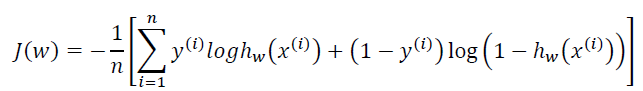

In [288]:
w = np.zeros(3)
w = w.reshape(3,1)
w

array([[0.],
       [0.],
       [0.]])

In [289]:
b = 1/(1+np.exp(-x))
b.T.shape

(3, 100)

In [290]:
a = np.dot(x,w)
a.shape

(100, 1)

In [291]:
# hypothesis function 
def hypothesis(x,w):
    return np.dot(x,w)

In [306]:
x

,ones,exam_1,exam_2
0,1.0,0.065428,0.694655
1,1.0,0.003266,0.194705
2,1.0,0.082968,0.619618
3,1.0,0.431764,0.816001
4,1.0,0.701943,0.655392
...,...,...,...
95,1.0,0.765817,0.260407
96,1.0,0.174904,0.827651
97,1.0,0.992649,0.559166
98,1.0,0.362356,0.502865


In [318]:
def compute_cost(x,y,w):
    func = 1/n * (np.sum(- y * (np.log(sigmoid(hypothesis(x,w)))) - (1-y)*np.log(1-sigmoid(hypothesis(x,w)))))
    return func 
result = compute_cost(x,y,np.array([1,2,3]))
print(result)

1.115739277437995


In [293]:
a =hypothesis(x,w)
a.shape

(100, 1)

In [316]:
y.shape

(100, 1)

In [294]:
w.shape

(3, 1)

c) Write code that finds the best fit parameters for logistic regression using gradient descent from scratch. You should be able to change training step and number of iterations through the variables (or input to the function). In addition, you should save the cost value at each iteration for plottting.
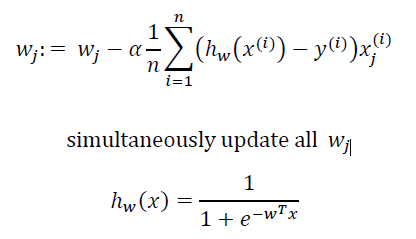

In [325]:
# gradient descent function 
iterations = 30000 #1000
alpha = 0.01  # 0.01
list1=[]
def gradient_descent(x,y,w,alpha,iterations):
    for i in range(iterations+1):
        loss_func = sigmoid(hypothesis(x,w))-y
        gradient = (np.dot(x.T,loss_func))/n
        w = w - alpha*gradient
        func = compute_cost(x, y, w)
        list1.append(func)
        print(f" cost function:{func}")
    return w
w = gradient_descent(x,y,w,alpha,iterations)
print(w)

 cost function:21.492941683429112
 cost function:21.437365249965282
 cost function:21.382057144866025
 cost function:21.32701554735555
 cost function:21.272238651965395
 cost function:21.21772466838786
 cost function:21.163471821330837
 cost function:21.10947835037413
 cost function:21.055742509827237
 cost function:21.002262568588584
 cost function:20.949036810006103
 cost function:20.896063531739298
 cost function:20.84334104562267
 cost function:20.790867677530542
 cost function:20.738641767243234
 cost function:20.686661668314592
 cost function:20.63492574794087
 cost function:20.583432386830967
 cost function:20.532179979077913
 cost function:20.48116693203172
 cost function:20.430391666173502
 cost function:20.37985261499087
 cost function:20.329548224854587
 cost function:20.279476954896523
 cost function:20.229637276888777
 cost function:20.180027675124055
 cost function:20.130646646297336
 cost function:20.081492699388612
 cost function:20.03256435554694
 cost function:19.9838

 cost function:12.07075824445744
 cost function:12.052304517175656
 cost function:12.03390550144005
 cost function:12.015560959780455
 cost function:11.997270656071594
 cost function:11.97903435552375
 cost function:11.960851824673528
 cost function:11.942722831374706
 cost function:11.924647144789123
 cost function:11.906624535377667
 cost function:11.888654774891332
 cost function:11.870737636362346
 cost function:11.852872894095372
 cost function:11.835060323658766
 cost function:11.817299701875925
 cost function:11.7995908068167
 cost function:11.78193341778887
 cost function:11.764327315329686
 cost function:11.746772281197488
 cost function:11.729268098363391
 cost function:11.71181455100302
 cost function:11.694411424488344
 cost function:11.677058505379536
 cost function:11.659755581416928
 cost function:11.642502441513015
 cost function:11.625298875744532
 cost function:11.608144675344576
 cost function:11.59103963269482
 cost function:11.573983541317757
 cost function:11.5569

 cost function:8.090234566095493
 cost function:8.081788017024092
 cost function:8.073358778540781
 cost function:8.064946798222772
 cost function:8.056552023856403
 cost function:8.048174403436123
 cost function:8.03981388516344
 cost function:8.031470417445924
 cost function:8.023143948896182
 cost function:8.014834428330845
 cost function:8.006541804769581
 cost function:7.998266027434091
 cost function:7.990007045747111
 cost function:7.981764809331438
 cost function:7.973539268008949
 cost function:7.965330371799625
 cost function:7.957138070920586
 cost function:7.948962315785125
 cost function:7.940803057001759
 cost function:7.932660245373271
 cost function:7.924533831895769
 cost function:7.916423767757745
 cost function:7.908330004339135
 cost function:7.900252493210401
 cost function:7.892191186131602
 cost function:7.88414603505147
 cost function:7.876116992106509
 cost function:7.868104009620072
 cost function:7.860107040101479
 cost function:7.852126036245094
 cost functi

 cost function:6.103696927531127
 cost function:6.098848476919793
 cost function:6.094007632937766
 cost function:6.089174377881416
 cost function:6.0843486941015685
 cost function:6.0795305640032975
 cost function:6.07471997004571
 cost function:6.069916894741753
 cost function:6.065121320657995
 cost function:6.0603332304144315
 cost function:6.05555260668428
 cost function:6.050779432193768
 cost function:6.0460136897219545
 cost function:6.041255362100503
 cost function:6.036504432213499
 cost function:6.031760882997246
 cost function:6.02702469744007
 cost function:6.022295858582116
 cost function:6.017574349515164
 cost function:6.012860153382424
 cost function:6.008153253378343
 cost function:6.003453632748419
 cost function:5.998761274788999
 cost function:5.994076162847091
 cost function:5.989398280320181
 cost function:5.984727610656029
 cost function:5.98006413735249
 cost function:5.975407843957323
 cost function:5.970758714068007
 cost function:5.966116731331546
 cost func

 cost function:4.8883380702743615
 cost function:4.88521422527808
 cost function:4.882094338734548
 cost function:4.878978403184489
 cost function:4.8758664111872365
 cost function:4.87275835532067
 cost function:4.869654228181172
 cost function:4.8665540223835535
 cost function:4.863457730561014
 cost function:4.8603653453650715
 cost function:4.857276859465514
 cost function:4.854192265550335
 cost function:4.851111556325684
 cost function:4.848034724515814
 cost function:4.844961762863014
 cost function:4.841892664127561
 cost function:4.838827421087666
 cost function:4.835766026539414
 cost function:4.832708473296709
 cost function:4.829654754191227
 cost function:4.826604862072352
 cost function:4.823558789807125
 cost function:4.820516530280189
 cost function:4.817478076393745
 cost function:4.814443421067478
 cost function:4.811412557238518
 cost function:4.808385477861387
 cost function:4.805362175907946
 cost function:4.802342644367324
 cost function:4.799326876245892
 cost fu

 cost function:4.14977182881942
 cost function:4.1475154812338815
 cost function:4.145261572581676
 cost function:4.143010098936356
 cost function:4.14076105637985
 cost function:4.138514441002449
 cost function:4.136270248902769
 cost function:4.134028476187747
 cost function:4.131789118972601
 cost function:4.129552173380825
 cost function:4.12731763554415
 cost function:4.125085501602539
 cost function:4.122855767704154
 cost function:4.120628430005336
 cost function:4.118403484670588
 cost function:4.116180927872548
 cost function:4.113960755791972
 cost function:4.111742964617707
 cost function:4.109527550546679
 cost function:4.107314509783862
 cost function:4.10510383854226
 cost function:4.10289553304289
 cost function:4.1006895895147535
 cost function:4.0984860041948235
 cost function:4.096284773328014
 cost function:4.094085893167174
 cost function:4.091889359973047
 cost function:4.089695170014271
 cost function:4.087503319567337
 cost function:4.085313804916586
 cost functi

 cost function:3.594083370400007
 cost function:3.5923885335759214
 cost function:3.5906952887502235
 cost function:3.589003633692986
 cost function:3.5873135661784277
 cost function:3.5856250839848984
 cost function:3.5839381848948735
 cost function:3.582252866694942
 cost function:3.5805691271758
 cost function:3.578886964132239
 cost function:3.5772063753631334
 cost function:3.575527358671441
 cost function:3.573849911864181
 cost function:3.572174032752435
 cost function:3.5704997191513304
 cost function:3.5688269688800363
 cost function:3.56715577976175
 cost function:3.5654861496236903
 cost function:3.5638180762970895
 cost function:3.5621515576171805
 cost function:3.5604865914231874
 cost function:3.558823175558326
 cost function:3.557161307869777
 cost function:3.555500986208695
 cost function:3.5538422084301886
 cost function:3.5521849723933094
 cost function:3.5505292759610563
 cost function:3.54887511700035
 cost function:3.5472224933820375
 cost function:3.54557140298087

 cost function:3.175886441081077
 cost function:3.1745620760299484
 cost function:3.1732388127576314
 cost function:3.171916649895996
 cost function:3.1705955860791724
 cost function:3.1692756199435332
 cost function:3.1679567501277037
 cost function:3.166638975272547
 cost function:3.1653222940211623
 cost function:3.1640067050188874
 cost function:3.1626922069132775
 cost function:3.161378798354117
 cost function:3.16006647799341
 cost function:3.158755244485369
 cost function:3.157445096486422
 cost function:3.156136032655194
 cost function:3.1548280516525193
 cost function:3.153521152141423
 cost function:3.1522153327871214
 cost function:3.1509105922570204
 cost function:3.149606929220704
 cost function:3.1483043423499395
 cost function:3.1470028303186606
 cost function:3.14570239180298
 cost function:3.1444030254811657
 cost function:3.1431047300336514
 cost function:3.1418075041430247
 cost function:3.1405113464940246
 cost function:3.139216255773539
 cost function:3.13792223067

 cost function:2.8769804420536293
 cost function:2.875893264700114
 cost function:2.8748069078808483
 cost function:2.873721370670831
 cost function:2.872636652146442
 cost function:2.871552751385446
 cost function:2.8704696674669883
 cost function:2.869387399471587
 cost function:2.868305946481138
 cost function:2.8672253075789103
 cost function:2.8661454818495384
 cost function:2.865066468379027
 cost function:2.863988266254746
 cost function:2.8629108745654244
 cost function:2.861834292401148
 cost function:2.860758518853369
 cost function:2.8596835530148845
 cost function:2.858609393979848
 cost function:2.857536040843759
 cost function:2.856463492703467
 cost function:2.855391748657165
 cost function:2.854320807804388
 cost function:2.853250669246007
 cost function:2.8521813320842346
 cost function:2.851112795422614
 cost function:2.8500450583660224
 cost function:2.8489781200206648
 cost function:2.8479119794940755
 cost function:2.8468466358951092
 cost function:2.84578208833394

 cost function:2.6096169948484316
 cost function:2.608722377058074
 cost function:2.6078283724308697
 cost function:2.6069349803386968
 cost function:2.606042200154286
 cost function:2.605150031251225
 cost function:2.6042584730039513
 cost function:2.6033675247877524
 cost function:2.6024771859787683
 cost function:2.6015874559539816
 cost function:2.6006983340912275
 cost function:2.599809819769181
 cost function:2.5989219123673597
 cost function:2.59803461126613
 cost function:2.5971479158466924
 cost function:2.596261825491089
 cost function:2.5953763395821965
 cost function:2.594491457503736
 cost function:2.593607178640255
 cost function:2.5927235023771367
 cost function:2.5918404281006002
 cost function:2.590957955197691
 cost function:2.590076083056288
 cost function:2.5891948110650906
 cost function:2.5883141386136335
 cost function:2.5874340650922707
 cost function:2.5865545898921805
 cost function:2.5856757124053673
 cost function:2.5847974320246534
 cost function:2.58391974

 cost function:2.3944813589422633
 cost function:2.3937281953741634
 cost function:2.392975505838555
 cost function:2.3922232898892832
 cost function:2.39147154708075
 cost function:2.390720276967913
 cost function:2.3899694791062913
 cost function:2.3892191530519535
 cost function:2.388469298361526
 cost function:2.3877199145921906
 cost function:2.3869710013016774
 cost function:2.3862225580482725
 cost function:2.3854745843908125
 cost function:2.3847270798886817
 cost function:2.38398004410182
 cost function:2.3832334765907093
 cost function:2.3824873769163815
 cost function:2.3817417446404163
 cost function:2.3809965793249424
 cost function:2.3802518805326276
 cost function:2.3795076478266886
 cost function:2.378763880770882
 cost function:2.3780205789295117
 cost function:2.37727774186742
 cost function:2.3765353691499924
 cost function:2.3757934603431523
 cost function:2.375052015013366
 cost function:2.3743110327276318
 cost function:2.3735705130534956
 cost function:2.37283045

 cost function:2.1911231172630896
 cost function:2.190492567020978
 cost function:2.1898623801588655
 cost function:2.189232556363429
 cost function:2.1886030953217177
 cost function:2.1879739967211274
 cost function:2.1873452602494177
 cost function:2.186716885594706
 cost function:2.1860888724454672
 cost function:2.185461220490529
 cost function:2.184833929419078
 cost function:2.184206998920661
 cost function:2.1835804286851697
 cost function:2.18295421840286
 cost function:2.182328367764336
 cost function:2.1817028764605575
 cost function:2.1810777441828373
 cost function:2.1804529706228415
 cost function:2.1798285554725867
 cost function:2.179204498424443
 cost function:2.178580799171131
 cost function:2.1779574574057197
 cost function:2.1773344728216313
 cost function:2.176711845112636
 cost function:2.1760895739728547
 cost function:2.1754676590967525
 cost function:2.1748461001791486
 cost function:2.1742248969152063
 cost function:2.1736040490004367
 cost function:2.172983556

 cost function:2.022863667726005
 cost function:2.0223263922781847
 cost function:2.0217894027909193
 cost function:2.0212526990363897
 cost function:2.020716280787023
 cost function:2.020180147815484
 cost function:2.019644299894683
 cost function:2.0191087367977665
 cost function:2.01857345829812
 cost function:2.0180384641693743
 cost function:2.0175037541853933
 cost function:2.016969328120288
 cost function:2.0164351857483993
 cost function:2.015901326844314
 cost function:2.0153677511828505
 cost function:2.0148344585390725
 cost function:2.014301448688276
 cost function:2.0137687214059943
 cost function:2.0132362764680027
 cost function:2.012704113650305
 cost function:2.012172232729151
 cost function:2.011640633481018
 cost function:2.011109315682625
 cost function:2.0105782791109226
 cost function:2.010047523543097
 cost function:2.0095170487565714
 cost function:2.0089868545290046
 cost function:2.008456940638283
 cost function:2.007927306862533
 cost function:2.0073979529801

 cost function:1.880503741524747
 cost function:1.8800395878864395
 cost function:1.8795756639558607
 cost function:1.8791119695627876
 cost function:1.8786485045371664
 cost function:1.8781852687091085
 cost function:1.8777222619088931
 cost function:1.8772594839669674
 cost function:1.8767969347139462
 cost function:1.8763346139806074
 cost function:1.8758725215978993
 cost function:1.875410657396938
 cost function:1.8749490212089992
 cost function:1.8744876128655301
 cost function:1.8740264321981435
 cost function:1.8735654790386147
 cost function:1.8731047532188874
 cost function:1.872644254571067
 cost function:1.8721839829274294
 cost function:1.8717239381204087
 cost function:1.8712641199826094
 cost function:1.8708045283467973
 cost function:1.8703451630458994
 cost function:1.869886023913014
 cost function:1.8694271107813976
 cost function:1.8689684234844723
 cost function:1.8685099618558223
 cost function:1.8680517257291955
 cost function:1.867593714938506
 cost function:1.86

 cost function:1.7573137923412325
 cost function:1.7569086184752594
 cost function:1.7565036320117495
 cost function:1.7560988328208702
 cost function:1.7556942207729123
 cost function:1.75528979573828
 cost function:1.7548855575875049
 cost function:1.75448150619123
 cost function:1.7540776414202224
 cost function:1.753673963145368
 cost function:1.7532704712376688
 cost function:1.7528671655682482
 cost function:1.7524640460083454
 cost function:1.7520611124293237
 cost function:1.7516583647026556
 cost function:1.7512558026999412
 cost function:1.750853426292893
 cost function:1.7504512353533432
 cost function:1.7500492297532422
 cost function:1.749647409364655
 cost function:1.7492457740597693
 cost function:1.7488443237108848
 cost function:1.7484430581904244
 cost function:1.7480419773709215
 cost function:1.7476410811250314
 cost function:1.7472403693255225
 cost function:1.7468398418452853
 cost function:1.7464394985573217
 cost function:1.7460393393347513
 cost function:1.7456

 cost function:1.642209070460806
 cost function:1.641855398022978
 cost function:1.641501878453646
 cost function:1.641148511653811
 cost function:1.6407952975245552
 cost function:1.6404422359670494
 cost function:1.6400893268825505
 cost function:1.6397365701723958
 cost function:1.6393839657380116
 cost function:1.6390315134809093
 cost function:1.6386792133026797
 cost function:1.6383270651050068
 cost function:1.6379750687896522
 cost function:1.6376232242584647
 cost function:1.6372715314133777
 cost function:1.6369199901564082
 cost function:1.6365686003896582
 cost function:1.6362173620153138
 cost function:1.6358662749356443
 cost function:1.6355153390530026
 cost function:1.635164554269827
 cost function:1.63481392048864
 cost function:1.6344634376120448
 cost function:1.6341131055427331
 cost function:1.633762924183474
 cost function:1.6334128934371246
 cost function:1.633063013206625
 cost function:1.6327132833949958
 cost function:1.6323637039053438
 cost function:1.632014

 cost function:1.5535458507844169
 cost function:1.5532294698816633
 cost function:1.5529132183379382
 cost function:1.552597096073978
 cost function:1.5522811030105796
 cost function:1.5519652390686056
 cost function:1.551649504168983
 cost function:1.5513338982327032
 cost function:1.551018421180823
 cost function:1.5507030729344626
 cost function:1.5503878534148063
 cost function:1.5500727625431026
 cost function:1.5497578002406656
 cost function:1.5494429664288722
 cost function:1.5491282610291635
 cost function:1.5488136839630438
 cost function:1.548499235152081
 cost function:1.5481849145179107
 cost function:1.547870721982227
 cost function:1.5475566574667918
 cost function:1.5472427208934263
 cost function:1.5469289121840195
 cost function:1.5466152312605226
 cost function:1.5463016780449494
 cost function:1.5459882524593764
 cost function:1.545674954425947
 cost function:1.545361783866863
 cost function:1.545048740704392
 cost function:1.544735824860866
 cost function:1.544423

 cost function:1.464381334222317
 cost function:1.46410036542002
 cost function:1.4638195048906402
 cost function:1.4635387525716366
 cost function:1.4632581084005092
 cost function:1.4629775723148088
 cost function:1.4626971442521377
 cost function:1.4624168241501396
 cost function:1.4621366119465131
 cost function:1.4618565075789962
 cost function:1.4615765109853833
 cost function:1.4612966221035115
 cost function:1.4610168408712663
 cost function:1.4607371672265834
 cost function:1.4604576011074424
 cost function:1.460178142451874
 cost function:1.4598987911979524
 cost function:1.4596195472838047
 cost function:1.4593404106476007
 cost function:1.4590613812275615
 cost function:1.4587824589619502
 cost function:1.458503643789083
 cost function:1.4582249356473218
 cost function:1.457946334475071
 cost function:1.457667840210791
 cost function:1.4573894527929796
 cost function:1.4571111721601904
 cost function:1.4568329982510195
 cost function:1.456554931004109
 cost function:1.45627

 cost function:1.3877034047717616
 cost function:1.387451211076743
 cost function:1.3871991094617182
 cost function:1.3869470998762807
 cost function:1.3866951822700577
 cost function:1.3864433565927161
 cost function:1.386191622793957
 cost function:1.3859399808235215
 cost function:1.385688430631181
 cost function:1.385436972166752
 cost function:1.3851856053800804
 cost function:1.3849343302210515
 cost function:1.3846831466395884
 cost function:1.384432054585647
 cost function:1.3841810540092223
 cost function:1.3839301448603454
 cost function:1.3836793270890828
 cost function:1.3834286006455399
 cost function:1.383177965479855
 cost function:1.3829274215422023
 cost function:1.382676968782799
 cost function:1.3824266071518887
 cost function:1.3821763365997584
 cost function:1.3819261570767276
 cost function:1.3816760685331546
 cost function:1.3814260709194321
 cost function:1.3811761641859865
 cost function:1.3809263482832848
 cost function:1.380676623161827
 cost function:1.38042

 cost function:1.3184606854772516
 cost function:1.3182331424677765
 cost function:1.3180056783762688
 cost function:1.31777829316168
 cost function:1.3175509867829913
 cost function:1.3173237591992153
 cost function:1.31709661036939
 cost function:1.3168695402525843
 cost function:1.316642548807891
 cost function:1.3164156359944355
 cost function:1.3161888017713697
 cost function:1.3159620460978751
 cost function:1.3157353689331586
 cost function:1.3155087702364585
 cost function:1.3152822499670396
 cost function:1.3150558080841968
 cost function:1.3148294445472484
 cost function:1.3146031593155465
 cost function:1.3143769523484679
 cost function:1.3141508236054185
 cost function:1.3139247730458314
 cost function:1.3136988006291697
 cost function:1.3134729063149204
 cost function:1.3132470900626048
 cost function:1.3130213518317666
 cost function:1.3127956915819798
 cost function:1.3125701092728472
 cost function:1.3123446048639955
 cost function:1.312119178315084
 cost function:1.311

 cost function:1.253152224442794
 cost function:1.2529467704336528
 cost function:1.2527413841351775
 cost function:1.2525360655138995
 cost function:1.252330814536367
 cost function:1.2521256311691569
 cost function:1.251920515378861
 cost function:1.2517154671321005
 cost function:1.2515104863955122
 cost function:1.2513055731357585
 cost function:1.2511007273195234
 cost function:1.25089594891351
 cost function:1.2506912378844461
 cost function:1.2504865941990815
 cost function:1.250282017824188
 cost function:1.2500775087265552
 cost function:1.2498730668730007
 cost function:1.2496686922303597
 cost function:1.2494643847654887
 cost function:1.2492601444452691
 cost function:1.249055971236603
 cost function:1.248851865106413
 cost function:1.2486478260216445
 cost function:1.2484438539492633
 cost function:1.2482399488562583
 cost function:1.2480361107096405
 cost function:1.2478323394764417
 cost function:1.2476286351237138
 cost function:1.247424997618532
 cost function:1.247221

 cost function:1.1944106822144807
 cost function:1.1942241327736531
 cost function:1.1940376419155845
 cost function:1.1938512096126754
 cost function:1.1936648358373456
 cost function:1.1934785205620304
 cost function:1.1932922637591845
 cost function:1.1931060654012788
 cost function:1.1929199254608018
 cost function:1.192733843910258
 cost function:1.1925478207221696
 cost function:1.1923618558690796
 cost function:1.1921759493235424
 cost function:1.1919901010581329
 cost function:1.191804311045444
 cost function:1.1916185792580825
 cost function:1.1914329056686779
 cost function:1.1912472902498692
 cost function:1.1910617329743176
 cost function:1.1908762338147019
 cost function:1.1906907927437156
 cost function:1.190505409734071
 cost function:1.1903200847584956
 cost function:1.1901348177897348
 cost function:1.1899496088005526
 cost function:1.189764457763729
 cost function:1.189579364652059
 cost function:1.189394329438357
 cost function:1.1892093520954554
 cost function:1.189

 cost function:1.1373935649926556
 cost function:1.1372244922074817
 cost function:1.1370554699666986
 cost function:1.1368864982476343
 cost function:1.136717577027633
 cost function:1.1365487062840474
 cost function:1.1363798859942489
 cost function:1.1362111161356199
 cost function:1.136042396685558
 cost function:1.1358737276214705
 cost function:1.1357051089207821
 cost function:1.135536540560931
 cost function:1.1353680225193654
 cost function:1.135199554773549
 cost function:1.1350311373009614
 cost function:1.1348627700790894
 cost function:1.1346944530854413
 cost function:1.1345261862975324
 cost function:1.134357969692892
 cost function:1.1341898032490676
 cost function:1.1340216869436144
 cost function:1.1338536207541043
 cost function:1.1336856046581238
 cost function:1.1335176386332675
 cost function:1.1333497226571465
 cost function:1.13318185670739
 cost function:1.133014040761629
 cost function:1.1328462747975188
 cost function:1.132678558792724
 cost function:1.132510

 cost function:1.0877587809616502
 cost function:1.0876042216329136
 cost function:1.0874497064797
 cost function:1.0872952354830618
 cost function:1.0871408086240633
 cost function:1.0869864258837785
 cost function:1.0868320872432937
 cost function:1.086677792683708
 cost function:1.0865235421861246
 cost function:1.086369335731666
 cost function:1.0862151733014571
 cost function:1.0860610548766403
 cost function:1.085906980438366
 cost function:1.0857529499677943
 cost function:1.0855989634460976
 cost function:1.085445020854458
 cost function:1.0852911221740713
 cost function:1.0851372673861392
 cost function:1.0849834564718797
 cost function:1.0848296894125142
 cost function:1.0846759661892822
 cost function:1.0845222867834305
 cost function:1.0843686511762163
 cost function:1.0842150593489077
 cost function:1.0840615112827847
 cost function:1.0839080069591367
 cost function:1.0837545463592633
 cost function:1.083601129464476
 cost function:1.0834477562560987
 cost function:1.08329

 cost function:1.0482898140268493
 cost function:1.0481463301774767
 cost function:1.0480028858390984
 cost function:1.0478594809953876
 cost function:1.0477161156300248
 cost function:1.0475727897266978
 cost function:1.0474295032691057
 cost function:1.0472862562409562
 cost function:1.047143048625965
 cost function:1.0469998804078602
 cost function:1.046856751570373
 cost function:1.0467136620972486
 cost function:1.0465706119722373
 cost function:1.046427601179103
 cost function:1.0462846297016133
 cost function:1.046141697523549
 cost function:1.0459988046286965
 cost function:1.0458559510008534
 cost function:1.0457131366238261
 cost function:1.0455703614814282
 cost function:1.0454276255574846
 cost function:1.0452849288358261
 cost function:1.0451422713002956
 cost function:1.0449996529347418
 cost function:1.044857073723025
 cost function:1.0447145336490122
 cost function:1.0445720326965815
 cost function:1.0444295708496174
 cost function:1.0442871480920146
 cost function:1.04

 cost function:1.0145476457864786
 cost function:1.0144133034005594
 cost function:1.0142789968083055
 cost function:1.0141447259954086
 cost function:1.014010490947558
 cost function:1.0138762916504567
 cost function:1.0137421280898162
 cost function:1.0136080002513512
 cost function:1.0134739081207849
 cost function:1.0133398516838514
 cost function:1.0132058309262884
 cost function:1.013071845833846
 cost function:1.0129378963922753
 cost function:1.01280398258734
 cost function:1.0126701044048116
 cost function:1.012536261830466
 cost function:1.0124024548500883
 cost function:1.012268683449471
 cost function:1.0121349476144137
 cost function:1.0120012473307272
 cost function:1.0118675825842218
 cost function:1.0117339533607237
 cost function:1.0116003596460632
 cost function:1.0114668014260786
 cost function:1.0113332786866125
 cost function:1.01119979141352
 cost function:1.0110663395926611
 cost function:1.010932923209903
 cost function:1.0107995422511222
 cost function:1.010666

 cost function:0.9754163884794913
 cost function:0.9752922700292086
 cost function:0.9751681833625727
 cost function:0.975044128467365
 cost function:0.9749201053313743
 cost function:0.9747961139423962
 cost function:0.974672154288232
 cost function:0.9745482263566888
 cost function:0.9744243301355827
 cost function:0.9743004656127324
 cost function:0.9741766327759647
 cost function:0.9740528316131121
 cost function:0.9739290621120141
 cost function:0.9738053242605161
 cost function:0.973681618046468
 cost function:0.9735579434577284
 cost function:0.9734343004821614
 cost function:0.9733106891076364
 cost function:0.9731871093220312
 cost function:0.9730635611132264
 cost function:0.9729400444691106
 cost function:0.9728165593775792
 cost function:0.9726931058265348
 cost function:0.9725696838038814
 cost function:0.9724462932975343
 cost function:0.9723229342954133
 cost function:0.9721996067854427
 cost function:0.9720763107555557
 cost function:0.9719530461936907
 cost function:0.

 cost function:0.9451125253539219
 cost function:0.9449960458632682
 cost function:0.9448795952653994
 cost function:0.9447631735495554
 cost function:0.9446467807049816
 cost function:0.94453041672093
 cost function:0.944414081586659
 cost function:0.9442977752914316
 cost function:0.9441814978245132
 cost function:0.9440652491751779
 cost function:0.9439490293327046
 cost function:0.9438328382863768
 cost function:0.943716676025482
 cost function:0.9436005425393168
 cost function:0.94348443781718
 cost function:0.9433683618483769
 cost function:0.9432523146222169
 cost function:0.943136296128016
 cost function:0.9430203063550948
 cost function:0.9429043452927804
 cost function:0.9427884129304022
 cost function:0.9426725092572994
 cost function:0.9425566342628123
 cost function:0.9424407879362887
 cost function:0.9423249702670815
 cost function:0.942209181244548
 cost function:0.9420934208580506
 cost function:0.9419776890969592
 cost function:0.9418619859506467
 cost function:0.94174

 cost function:0.9145694678453832
 cost function:0.9144604415025727
 cost function:0.9143514413219069
 cost function:0.9142424672939603
 cost function:0.9141335194093108
 cost function:0.9140245976585439
 cost function:0.9139157020322475
 cost function:0.9138068325210137
 cost function:0.913697989115441
 cost function:0.91358917180613
 cost function:0.9134803805836886
 cost function:0.9133716154387267
 cost function:0.9132628763618601
 cost function:0.9131541633437084
 cost function:0.9130454763748972
 cost function:0.9129368154460531
 cost function:0.9128281805478113
 cost function:0.9127195716708105
 cost function:0.9126109888056899
 cost function:0.9125024319430998
 cost function:0.9123939010736893
 cost function:0.9122853961881142
 cost function:0.9121769172770355
 cost function:0.9120684643311197
 cost function:0.9119600373410336
 cost function:0.9118516362974508
 cost function:0.9117432611910512
 cost function:0.9116349120125179
 cost function:0.9115265887525351
 cost function:0.

 cost function:0.8877953943015637
 cost function:0.8876926981591231
 cost function:0.8875900259316051
 cost function:0.8874873776106472
 cost function:0.8873847531878934
 cost function:0.8872821526549868
 cost function:0.8871795760035798
 cost function:0.8870770232253247
 cost function:0.8869744943118812
 cost function:0.8868719892549093
 cost function:0.8867695080460746
 cost function:0.8866670506770473
 cost function:0.8865646171395
 cost function:0.886462207425112
 cost function:0.8863598215255611
 cost function:0.8862574594325348
 cost function:0.886155121137719
 cost function:0.88605280663281
 cost function:0.8859505159095028
 cost function:0.8858482489594968
 cost function:0.885746005774498
 cost function:0.8856437863462131
 cost function:0.8855415906663545
 cost function:0.8854394187266386
 cost function:0.8853372705187843
 cost function:0.8852351460345156
 cost function:0.88513304526556
 cost function:0.885030968203648
 cost function:0.8849289148405158
 cost function:0.88482688

 cost function:0.8629417879679916
 cost function:0.8628447980306905
 cost function:0.8627478300410597
 cost function:0.8626508839916421
 cost function:0.862553959874984
 cost function:0.8624570576836333
 cost function:0.8623601774101443
 cost function:0.8622633190470725
 cost function:0.8621664825869755
 cost function:0.8620696680224187
 cost function:0.8619728753459677
 cost function:0.8618761045501906
 cost function:0.8617793556276627
 cost function:0.8616826285709576
 cost function:0.8615859233726566
 cost function:0.8614892400253422
 cost function:0.8613925785216004
 cost function:0.8612959388540213
 cost function:0.8611993210151979
 cost function:0.8611027249977272
 cost function:0.861006150794207
 cost function:0.8609095983972422
 cost function:0.8608130677994379
 cost function:0.8607165589934042
 cost function:0.8606200719717547
 cost function:0.8605236067271063
 cost function:0.8604271632520781
 cost function:0.8603307415392932
 cost function:0.8602343415813769
 cost function:0

 cost function:0.8347970173326708
 cost function:0.8347062916717743
 cost function:0.8346155858647137
 cost function:0.8345248999049665
 cost function:0.8344342337860085
 cost function:0.8343435875013252
 cost function:0.8342529610443978
 cost function:0.834162354408715
 cost function:0.8340717675877659
 cost function:0.8339812005750432
 cost function:0.8338906533640436
 cost function:0.8338001259482644
 cost function:0.8337096183212078
 cost function:0.8336191304763776
 cost function:0.8335286624072822
 cost function:0.8334382141074288
 cost function:0.8333477855703317
 cost function:0.8332573767895071
 cost function:0.8331669877584719
 cost function:0.8330766184707483
 cost function:0.8329862689198619
 cost function:0.8328959390993359
 cost function:0.8328056290027032
 cost function:0.8327153386234958
 cost function:0.832625067955248
 cost function:0.8325348169914978
 cost function:0.8324445857257895
 cost function:0.8323543741516644
 cost function:0.8322641822626669
 cost function:0

 cost function:0.8123734852103867
 cost function:0.812287600250293
 cost function:0.8122017335746538
 cost function:0.8121158851776243
 cost function:0.8120300550533602
 cost function:0.8119442431960203
 cost function:0.811858449599768
 cost function:0.8117726742587662
 cost function:0.8116869171671816
 cost function:0.8116011783191825
 cost function:0.8115154577089416
 cost function:0.8114297553306326
 cost function:0.8113440711784331
 cost function:0.8112584052465199
 cost function:0.811172757529075
 cost function:0.8110871280202833
 cost function:0.811001516714331
 cost function:0.8109159236054067
 cost function:0.8108303486877014
 cost function:0.8107447919554092
 cost function:0.8106592534027263
 cost function:0.8105737330238538
 cost function:0.8104882308129889
 cost function:0.8104027467643369
 cost function:0.8103172808721054
 cost function:0.8102318331305015
 cost function:0.8101464035337369
 cost function:0.8100609920760258
 cost function:0.8099755987515832
 cost function:0.8

 cost function:0.7901548844970898
 cost function:0.7900736646313375
 cost function:0.789992461578918
 cost function:0.7899112753346025
 cost function:0.7898301058931668
 cost function:0.7897489532493894
 cost function:0.7896678173980479
 cost function:0.7895866983339238
 cost function:0.7895055960518021
 cost function:0.7894245105464657
 cost function:0.7893434418127031
 cost function:0.7892623898453064
 cost function:0.7891813546390677
 cost function:0.7891003361887791
 cost function:0.7890193344892384
 cost function:0.7889383495352442
 cost function:0.7888573813215969
 cost function:0.7887764298431009
 cost function:0.78869549509456
 cost function:0.7886145770707801
 cost function:0.7885336757665734
 cost function:0.7884527911767503
 cost function:0.7883719232961249
 cost function:0.7882910721195122
 cost function:0.7882102376417297
 cost function:0.7881294198575991
 cost function:0.7880486187619422
 cost function:0.7879678343495832
 cost function:0.787887066615348
 cost function:0.7

 cost function:0.7671321709809472
 cost function:0.7670556471002432
 cost function:0.7669791385941599
 cost function:0.7669026454580575
 cost function:0.7668261676872998
 cost function:0.7667497052772511
 cost function:0.7666732582232771
 cost function:0.7665968265207459
 cost function:0.7665204101650271
 cost function:0.7664440091514928
 cost function:0.7663676234755151
 cost function:0.7662912531324716
 cost function:0.7662148981177385
 cost function:0.7661385584266935
 cost function:0.7660622340547201
 cost function:0.7659859249972004
 cost function:0.7659096312495186
 cost function:0.7658333528070617
 cost function:0.7657570896652165
 cost function:0.7656808418193759
 cost function:0.7656046092649316
 cost function:0.7655283919972743
 cost function:0.765452190011804
 cost function:0.7653760033039169
 cost function:0.7652998318690112
 cost function:0.7652236757024886
 cost function:0.7651475347997547
 cost function:0.7650714091562124
 cost function:0.7649952987672685
 cost function:

 cost function:0.7467243388085938
 cost function:0.7466518601741972
 cost function:0.7465793957099658
 cost function:0.7465069454117372
 cost function:0.746434509275354
 cost function:0.7463620872966553
 cost function:0.7462896794714873
 cost function:0.7462172857956941
 cost function:0.746144906265122
 cost function:0.7460725408756212
 cost function:0.7460001896230408
 cost function:0.7459278525032316
 cost function:0.7458555295120504
 cost function:0.7457832206453466
 cost function:0.7457109258989825
 cost function:0.745638645268813
 cost function:0.7455663787506999
 cost function:0.7454941263405036
 cost function:0.7454218880340859
 cost function:0.7453496638273139
 cost function:0.745277453716053
 cost function:0.7452052576961711
 cost function:0.7451330757635373
 cost function:0.745060907914025
 cost function:0.7449887541435029
 cost function:0.7449166144478495
 cost function:0.7448444888229375
 cost function:0.7447723772646481
 cost function:0.7447002797688573
 cost function:0.74

 cost function:0.7274501845493838
 cost function:0.7273814251614799
 cost function:0.7273126788656493
 cost function:0.7272439456581481
 cost function:0.7271752255352323
 cost function:0.7271065184931618
 cost function:0.7270378245281949
 cost function:0.7269691436365924
 cost function:0.726900475814618
 cost function:0.7268318210585355
 cost function:0.7267631793646112
 cost function:0.7266945507291106
 cost function:0.7266259351483028
 cost function:0.7265573326184576
 cost function:0.7264887431358455
 cost function:0.7264201666967394
 cost function:0.726351603297415
 cost function:0.7262830529341445
 cost function:0.7262145156032085
 cost function:0.7261459913008824
 cost function:0.7260774800234471
 cost function:0.7260089817671824
 cost function:0.7259404965283729
 cost function:0.7258720243033006
 cost function:0.7258035650882532
 cost function:0.7257351188795153
 cost function:0.7256666856733753
 cost function:0.7255982654661242
 cost function:0.7255298582540525
 cost function:0

 cost function:0.7086957277254138
 cost function:0.7086304928623537
 cost function:0.708565270096326
 cost function:0.7085000594239604
 cost function:0.708434860841889
 cost function:0.7083696743467424
 cost function:0.7083044999351574
 cost function:0.7082393376037665
 cost function:0.7081741873492076
 cost function:0.7081090491681189
 cost function:0.7080439230571365
 cost function:0.7079788090129039
 cost function:0.707913707032061
 cost function:0.7078486171112504
 cost function:0.7077835392471171
 cost function:0.7077184734363045
 cost function:0.7076534196754605
 cost function:0.7075883779612305
 cost function:0.7075233482902665
 cost function:0.7074583306592175
 cost function:0.7073933250647341
 cost function:0.7073283315034682
 cost function:0.7072633499720763
 cost function:0.7071983804672116
 cost function:0.7071334229855301
 cost function:0.7070684775236901
 cost function:0.7070035440783501
 cost function:0.706938622646171
 cost function:0.7068737132238129
 cost function:0.7

 cost function:0.6912006275251688
 cost function:0.6911385965478158
 cost function:0.6910765767860357
 cost function:0.6910145682367828
 cost function:0.6909525708970093
 cost function:0.6908905847636734
 cost function:0.6908286098337293
 cost function:0.6907666461041374
 cost function:0.6907046935718557
 cost function:0.6906427522338454
 cost function:0.690580822087067
 cost function:0.6905189031284832
 cost function:0.690456995355058
 cost function:0.6903950987637539
 cost function:0.6903332133515392
 cost function:0.6902713391153791
 cost function:0.6902094760522425
 cost function:0.6901476241590976
 cost function:0.6900857834329154
 cost function:0.6900239538706662
 cost function:0.6899621354693228
 cost function:0.6899003282258586
 cost function:0.6898385321372471
 cost function:0.6897767472004648
 cost function:0.6897149734124886
 cost function:0.6896532107702963
 cost function:0.6895914592708661
 cost function:0.6895297189111769
 cost function:0.6894679896882133
 cost function:0

 cost function:0.6730811362484606
 cost function:0.6730223380682049
 cost function:0.6729635502369548
 cost function:0.6729047727519779
 cost function:0.6728460056105374
 cost function:0.6727872488098977
 cost function:0.6727285023473255
 cost function:0.6726697662200892
 cost function:0.6726110404254549
 cost function:0.6725523249606942
 cost function:0.6724936198230753
 cost function:0.6724349250098708
 cost function:0.6723762405183509
 cost function:0.6723175663457914
 cost function:0.6722589024894637
 cost function:0.6722002489466441
 cost function:0.6721416057146083
 cost function:0.6720829727906333
 cost function:0.6720243501719979
 cost function:0.6719657378559774
 cost function:0.6719071358398557
 cost function:0.6718485441209116
 cost function:0.6717899626964272
 cost function:0.6717313915636842
 cost function:0.6716728307199675
 cost function:0.67161428016256
 cost function:0.67155573988875
 cost function:0.6714972098958216
 cost function:0.6714386901810632
 cost function:0.6

 cost function:0.6570682225610291
 cost function:0.6570122089804303
 cost function:0.6569562050212906
 cost function:0.6569002106811291
 cost function:0.6568442259574646
 cost function:0.6567882508478127
 cost function:0.656732285349695
 cost function:0.6566763294606307
 cost function:0.6566203831781432
 cost function:0.6565644464997508
 cost function:0.6565085194229799
 cost function:0.6564526019453537
 cost function:0.6563966940643952
 cost function:0.6563407957776312
 cost function:0.6562849070825874
 cost function:0.6562290279767911
 cost function:0.6561731584577705
 cost function:0.6561172985230556
 cost function:0.6560614481701736
 cost function:0.6560056073966571
 cost function:0.6559497762000379
 cost function:0.655893954577847
 cost function:0.6558381425276173
 cost function:0.6557823400468837
 cost function:0.6557265471331818
 cost function:0.6556707637840452
 cost function:0.6556149899970113
 cost function:0.6555592257696181
 cost function:0.6555034710994031
 cost function:0

 cost function:0.6415912422075882
 cost function:0.6415378555206176
 cost function:0.6414844777851867
 cost function:0.6414311089990387
 cost function:0.6413777491599209
 cost function:0.6413243982655793
 cost function:0.64127105631376
 cost function:0.6412177233022119
 cost function:0.6411643992286818
 cost function:0.6411110840909224
 cost function:0.641057777886681
 cost function:0.6410044806137093
 cost function:0.6409511922697604
 cost function:0.6408979128525839
 cost function:0.640844642359934
 cost function:0.640791380789567
 cost function:0.6407381281392346
 cost function:0.6406848844066937
 cost function:0.6406316495896996
 cost function:0.6405784236860099
 cost function:0.6405252066933812
 cost function:0.6404719986095744
 cost function:0.6404187994323474
 cost function:0.640365609159458
 cost function:0.6403124277886698
 cost function:0.6402592553177431
 cost function:0.6402060917444404
 cost function:0.6401529370665239
 cost function:0.6400997912817589
 cost function:0.640

 cost function:0.6282103261216565
 cost function:0.6281591594603441
 cost function:0.628108001197132
 cost function:0.6280568513299501
 cost function:0.6280057098567288
 cost function:0.6279545767753968
 cost function:0.6279034520838859
 cost function:0.6278523357801283
 cost function:0.6278012278620555
 cost function:0.6277501283276001
 cost function:0.627699037174697
 cost function:0.6276479544012786
 cost function:0.6275968800052815
 cost function:0.6275458139846406
 cost function:0.6274947563372939
 cost function:0.6274437070611755
 cost function:0.6273926661542243
 cost function:0.6273416336143813
 cost function:0.6272906094395821
 cost function:0.6272395936277682
 cost function:0.6271885861768788
 cost function:0.6271375870848565
 cost function:0.6270865963496418
 cost function:0.627035613969178
 cost function:0.6269846399414073
 cost function:0.6269336742642739
 cost function:0.6268827169357233
 cost function:0.6268317679536998
 cost function:0.6267808273161483
 cost function:0.

 cost function:0.6138134312031616
 cost function:0.6137646002075393
 cost function:0.6137157770406263
 cost function:0.6136669617005353
 cost function:0.6136181541853827
 cost function:0.6135693544932839
 cost function:0.613520562622353
 cost function:0.6134717785707074
 cost function:0.613423002336465
 cost function:0.6133742339177427
 cost function:0.6133254733126589
 cost function:0.6132767205193311
 cost function:0.6132279755358808
 cost function:0.6131792383604271
 cost function:0.6131305089910909
 cost function:0.6130817874259936
 cost function:0.6130330736632567
 cost function:0.6129843677010035
 cost function:0.6129356695373565
 cost function:0.6128869791704395
 cost function:0.6128382965983764
 cost function:0.6127896218192929
 cost function:0.6127409548313137
 cost function:0.6126922956325667
 cost function:0.6126436442211765
 cost function:0.6125950005952702
 cost function:0.6125463647529772
 cost function:0.6124977366924251
 cost function:0.6124491164117448
 cost function:0

 cost function:0.6017507380918533
 cost function:0.6017038218437001
 cost function:0.6016569129675381
 cost function:0.6016100114616245
 cost function:0.6015631173242222
 cost function:0.6015162305535886
 cost function:0.6014693511479867
 cost function:0.6014224791056779
 cost function:0.6013756144249234
 cost function:0.6013287571039861
 cost function:0.6012819071411295
 cost function:0.6012350645346176
 cost function:0.601188229282714
 cost function:0.6011414013836839
 cost function:0.6010945808357929
 cost function:0.601047767637306
 cost function:0.6010009617864911
 cost function:0.6009541632816132
 cost function:0.6009073721209426
 cost function:0.6008605883027455
 cost function:0.6008138118252907
 cost function:0.6007670426868473
 cost function:0.6007202808856861
 cost function:0.6006735264200758
 cost function:0.6006267792882877
 cost function:0.6005800394885948
 cost function:0.6005333070192673
 cost function:0.6004865818785785
 cost function:0.600439864064801
 cost function:0.

 cost function:0.5884919578113498
 cost function:0.5884471017527401
 cost function:0.5884022525850597
 cost function:0.58835741030672
 cost function:0.5883125749161254
 cost function:0.5882677464116911
 cost function:0.5882229247918263
 cost function:0.5881781100549394
 cost function:0.5881333021994466
 cost function:0.5880885012237562
 cost function:0.588043707126283
 cost function:0.5879989199054405
 cost function:0.5879541395596399
 cost function:0.5879093660872979
 cost function:0.5878645994868273
 cost function:0.5878198397566446
 cost function:0.5877750868951638
 cost function:0.587730340900801
 cost function:0.5876856017719758
 cost function:0.5876408695071016
 cost function:0.5875961441045984
 cost function:0.5875514255628811
 cost function:0.5875067138803701
 cost function:0.5874620090554856
 cost function:0.5874173110866446
 cost function:0.5873726199722696
 cost function:0.5873279357107785
 cost function:0.5872832583005939
 cost function:0.5872385877401373
 cost function:0.5

 cost function:0.5758950100027902
 cost function:0.5758520682122824
 cost function:0.5758091328755414
 cost function:0.5757662039911087
 cost function:0.5757232815575245
 cost function:0.5756803655733354
 cost function:0.5756374560370832
 cost function:0.575594552947312
 cost function:0.5755516563025681
 cost function:0.5755087661013952
 cost function:0.5754658823423383
 cost function:0.5754230050239444
 cost function:0.5753801341447583
 cost function:0.5753372697033285
 cost function:0.5752944116982012
 cost function:0.5752515601279253
 cost function:0.5752087149910472
 cost function:0.5751658762861172
 cost function:0.5751230440116817
 cost function:0.575080218166292
 cost function:0.5750373987484977
 cost function:0.5749945857568494
 cost function:0.5749517791898971
 cost function:0.5749089790461916
 cost function:0.5748661853242863
 cost function:0.5748233980227307
 cost function:0.574780617140079
 cost function:0.5747378426748846
 cost function:0.5746950746256994
 cost function:0.

 cost function:0.5644892087762412
 cost function:0.5644479640346494
 cost function:0.564406725367351
 cost function:0.5643654927730019
 cost function:0.5643242662502564
 cost function:0.5642830457977728
 cost function:0.5642418314142088
 cost function:0.5642006230982194
 cost function:0.5641594208484614
 cost function:0.564118224663596
 cost function:0.5640770345422801
 cost function:0.5640358504831712
 cost function:0.5639946724849295
 cost function:0.563953500546215
 cost function:0.5639123346656864
 cost function:0.5638711748420064
 cost function:0.5638300210738328
 cost function:0.5637888733598281
 cost function:0.5637477316986551
 cost function:0.5637065960889734
 cost function:0.5636654665294463
 cost function:0.5636243430187373
 cost function:0.5635832255555087
 cost function:0.5635421141384237
 cost function:0.5635010087661454
 cost function:0.563459909437341
 cost function:0.563418816150674
 cost function:0.5633777289048081
 cost function:0.563336647698409
 cost function:0.563

 cost function:0.5534108647166199
 cost function:0.5533712353623514
 cost function:0.5533316117283706
 cost function:0.55329199381344
 cost function:0.5532523816163148
 cost function:0.5532127751357583
 cost function:0.5531731743705295
 cost function:0.5531335793193886
 cost function:0.5530939899810969
 cost function:0.5530544063544156
 cost function:0.5530148284381057
 cost function:0.5529752562309309
 cost function:0.552935689731651
 cost function:0.5528961289390304
 cost function:0.552856573851831
 cost function:0.5528170244688172
 cost function:0.5527774807887532
 cost function:0.5527379428104012
 cost function:0.5526984105325277
 cost function:0.5526588839538963
 cost function:0.5526193630732713
 cost function:0.5525798478894214
 cost function:0.5525403384011083
 cost function:0.5525008346071018
 cost function:0.5524613365061672
 cost function:0.5524218440970716
 cost function:0.5523823573785817
 cost function:0.5523428763494649
 cost function:0.5523034010084895
 cost function:0.5

 cost function:0.5409391565303688
 cost function:0.5409013069017207
 cost function:0.5408634626116529
 cost function:0.5408256236590393
 cost function:0.5407877900427431
 cost function:0.540749961761635
 cost function:0.5407121388145868
 cost function:0.5406743212004663
 cost function:0.5406365089181423
 cost function:0.5405987019664872
 cost function:0.5405609003443695
 cost function:0.540523104050661
 cost function:0.540485313084233
 cost function:0.5404475274439563
 cost function:0.5404097471287037
 cost function:0.5403719721373466
 cost function:0.5403342024687584
 cost function:0.54029643812181
 cost function:0.5402586790953761
 cost function:0.5402209253883313
 cost function:0.5401831769995463
 cost function:0.5401454339278963
 cost function:0.5401076961722565
 cost function:0.5400699637315023
 cost function:0.5400322366045056
 cost function:0.5399945147901446
 cost function:0.5399567982872944
 cost function:0.5399190870948288
 cost function:0.5398813812116267
 cost function:0.53

 cost function:0.5310193992520682
 cost function:0.530982935818578
 cost function:0.5309464774325312
 cost function:0.5309100240928738
 cost function:0.5308735757985591
 cost function:0.5308371325485366
 cost function:0.5308006943417555
 cost function:0.5307642611771695
 cost function:0.5307278330537271
 cost function:0.5306914099703821
 cost function:0.5306549919260863
 cost function:0.5306185789197903
 cost function:0.5305821709504499
 cost function:0.5305457680170129
 cost function:0.5305093701184385
 cost function:0.5304729772536735
 cost function:0.5304365894216769
 cost function:0.5304002066213996
 cost function:0.5303638288517969
 cost function:0.5303274561118245
 cost function:0.5302910884004345
 cost function:0.5302547257165852
 cost function:0.5302183680592287
 cost function:0.5301820154273232
 cost function:0.5301456678198241
 cost function:0.5301093252356868
 cost function:0.5300729876738688
 cost function:0.5300366551333269
 cost function:0.5300003276130186
 cost function:

 cost function:0.5213190874800805
 cost function:0.5212839544193654
 cost function:0.5212488261318526
 cost function:0.521213702616569
 cost function:0.5211785838725383
 cost function:0.5211434698987857
 cost function:0.5211083606943376
 cost function:0.521073256258223
 cost function:0.5210381565894656
 cost function:0.5210030616870942
 cost function:0.5209679715501344
 cost function:0.5209328861776141
 cost function:0.5208978055685631
 cost function:0.5208627297220059
 cost function:0.520827658636973
 cost function:0.5207925923124921
 cost function:0.5207575307475927
 cost function:0.5207224739413031
 cost function:0.520687421892652
 cost function:0.5206523746006705
 cost function:0.5206173320643869
 cost function:0.5205822942828321
 cost function:0.5205472612550367
 cost function:0.5205122329800307
 cost function:0.5204772094568464
 cost function:0.520442190684512
 cost function:0.520407176662061
 cost function:0.5203721673885254
 cost function:0.5203371628629356
 cost function:0.520

 cost function:0.5117324900861315
 cost function:0.511698647366387
 cost function:0.511664809158794
 cost function:0.5116309754624508
 cost function:0.5115971462764494
 cost function:0.5115633215998874
 cost function:0.5115295014318624
 cost function:0.5114956857714718
 cost function:0.5114618746178095
 cost function:0.5114280679699769
 cost function:0.5113942658270678
 cost function:0.5113604681881805
 cost function:0.5113266750524151
 cost function:0.5112928864188679
 cost function:0.5112591022866373
 cost function:0.5112253226548228
 cost function:0.5111915475225242
 cost function:0.5111577768888379
 cost function:0.5111240107528661
 cost function:0.5110902491137062
 cost function:0.5110564919704607
 cost function:0.5110227393222267
 cost function:0.5109889911681064
 cost function:0.5109552475071998
 cost function:0.5109215083386082
 cost function:0.5108877736614331
 cost function:0.510854043474773
 cost function:0.5108203177777331
 cost function:0.5107865965694139
 cost function:0.

 cost function:0.5018431641061782
 cost function:0.5018106270233111
 cost function:0.5017780941934926
 cost function:0.5017455656158891
 cost function:0.5017130412896629
 cost function:0.5016805212139811
 cost function:0.5016480053880075
 cost function:0.5016154938109072
 cost function:0.5015829864818453
 cost function:0.5015504833999899
 cost function:0.5015179845645034
 cost function:0.5014854899745548
 cost function:0.5014529996293086
 cost function:0.5014205135279327
 cost function:0.501388031669593
 cost function:0.5013555540534569
 cost function:0.5013230806786918
 cost function:0.5012906115444649
 cost function:0.5012581466499445
 cost function:0.501225685994297
 cost function:0.5011932295766909
 cost function:0.5011607773962956
 cost function:0.5011283294522788
 cost function:0.501095885743809
 cost function:0.5010634462700564
 cost function:0.5010310110301895
 cost function:0.5009985800233753
 cost function:0.5009661532487892
 cost function:0.5009337307055959
 cost function:0.

 cost function:0.4928959343792333
 cost function:0.4928645562862592
 cost function:0.49283318222066436
 cost function:0.49280181218167224
 cost function:0.4927704461685056
 cost function:0.492739084180391
 cost function:0.49270772621654707
 cost function:0.4926763722762005
 cost function:0.4926450223585747
 cost function:0.4926136764628935
 cost function:0.4925823345883818
 cost function:0.49255099673426445
 cost function:0.49251966289976684
 cost function:0.4924883330841112
 cost function:0.49245700728652575
 cost function:0.4924256855062354
 cost function:0.49239436774246437
 cost function:0.49236305399443864
 cost function:0.49233174426138543
 cost function:0.49230043854253064
 cost function:0.4922691368371002
 cost function:0.4922378391443208
 cost function:0.4922065454634199
 cost function:0.4921752557936228
 cost function:0.49214397013415784
 cost function:0.4921126884842511
 cost function:0.49208141084313484
 cost function:0.4920501372100317
 cost function:0.4920188675841707
 co

 cost function:0.4844766821214326
 cost function:0.484446375311616
 cost function:0.4844160723242774
 cost function:0.4843857731586922
 cost function:0.4843554778141333
 cost function:0.4843251862898799
 cost function:0.48429489858520436
 cost function:0.4842646146993855
 cost function:0.48423433463169774
 cost function:0.4842040583814186
 cost function:0.4841737859478246
 cost function:0.48414351733019245
 cost function:0.48411325252779785
 cost function:0.48408299153991907
 cost function:0.484052734365834
 cost function:0.484022481004819
 cost function:0.4839922314561514
 cost function:0.4839619857191113
 cost function:0.4839317437929747
 cost function:0.4839015056770206
 cost function:0.4838712713705269
 cost function:0.4838410408727741
 cost function:0.4838108141830369
 cost function:0.48378059130059864
 cost function:0.48375037222473555
 cost function:0.48372015695472814
 cost function:0.4836899454898554
 cost function:0.48365973782939764
 cost function:0.48362953397263453
 cost f

 cost function:0.47561130259941364
 cost function:0.4755821036000202
 cost function:0.47555290821500984
 cost function:0.4755237164437099
 cost function:0.47549452828545113
 cost function:0.47546534373955807
 cost function:0.4754361628053607
 cost function:0.475406985482187
 cost function:0.47537781176936333
 cost function:0.47534864166622015
 cost function:0.4753194751720847
 cost function:0.4752903122862875
 cost function:0.47526115300815613
 cost function:0.4752319973370196
 cost function:0.47520284527220796
 cost function:0.47517369681305055
 cost function:0.4751445519588775
 cost function:0.4751154107090169
 cost function:0.4750862730627996
 cost function:0.4750571390195569
 cost function:0.4750280085786182
 cost function:0.4749988817393132
 cost function:0.47496975850097267
 cost function:0.4749406388629282
 cost function:0.4749115228245111
 cost function:0.4748824103850517
 cost function:0.47485330154388006
 cost function:0.4748241963003308
 cost function:0.47479509465373243
 co

 cost function:0.4671797024903494
 cost function:0.46715153783746827
 cost function:0.4671233766082243
 cost function:0.4670952188019926
 cost function:0.4670670644181476
 cost function:0.4670389134560651
 cost function:0.4670107659151178
 cost function:0.4669826217946823
 cost function:0.4669544810941339
 cost function:0.46692634381284676
 cost function:0.46689820995019654
 cost function:0.4668700795055596
 cost function:0.4668419524783108
 cost function:0.46681382886782785
 cost function:0.4667857086734837
 cost function:0.46675759189465693
 cost function:0.4667294785307249
 cost function:0.4667013685810614
 cost function:0.46667326204504384
 cost function:0.4666451589220511
 cost function:0.46661705921145685
 cost function:0.4665889629126414
 cost function:0.4665608700249808
 cost function:0.4665327805478512
 cost function:0.4665046944806312
 cost function:0.46647661182269995
 cost function:0.4664485325734329
 cost function:0.46642045673220967
 cost function:0.4663923842984081
 cost

 cost function:0.4593434201451471
 cost function:0.45931619997654266
 cost function:0.4592889830604494
 cost function:0.45926176939627966
 cost function:0.4592345589834513
 cost function:0.4592073518213809
 cost function:0.4591801479094837
 cost function:0.4591529472471749
 cost function:0.4591257498338746
 cost function:0.4590985556689959
 cost function:0.45907136475195687
 cost function:0.45904417708217493
 cost function:0.45901699265906537
 cost function:0.45898981148204654
 cost function:0.4589626335505362
 cost function:0.45893545886395126
 cost function:0.45890828742170947
 cost function:0.4588811192232272
 cost function:0.4588539542679254
 cost function:0.4588267925552191
 cost function:0.4587996340845281
 cost function:0.4587724788552696
 cost function:0.45874532686686303
 cost function:0.4587181781187257
 cost function:0.4586910326102784
 cost function:0.45866389034093835
 cost function:0.458636751310125
 cost function:0.45860961551725693
 cost function:0.45858248296175264
 co

 cost function:0.45234762846623994
 cost function:0.45232123778212696
 cost function:0.4522948502026712
 cost function:0.45226846572732293
 cost function:0.45224208435553315
 cost function:0.45221570608675427
 cost function:0.45218933092043573
 cost function:0.4521629588560308
 cost function:0.45213658989298955
 cost function:0.45211022403076423
 cost function:0.4520838612688074
 cost function:0.4520575016065713
 cost function:0.45203114504350533
 cost function:0.4520047915790644
 cost function:0.45197844121270003
 cost function:0.45195209394386465
 cost function:0.45192574977201233
 cost function:0.45189940869659256
 cost function:0.45187307071706156
 cost function:0.4518467358328694
 cost function:0.4518204040434719
 cost function:0.4517940753483205
 cost function:0.45176774974687006
 cost function:0.4517414272385722
 cost function:0.4517151078228811
 cost function:0.4516887914992541
 cost function:0.4516624782671398
 cost function:0.451636168125994
 cost function:0.45160986107527207

 cost function:0.4452053055927261
 cost function:0.4451797484387871
 cost function:0.4451541942432665
 cost function:0.4451286430056491
 cost function:0.4451030947254215
 cost function:0.4450775494020669
 cost function:0.4450520070350721
 cost function:0.44502646762392345
 cost function:0.44500093116810413
 cost function:0.4449753976671036
 cost function:0.44494986712040496
 cost function:0.4449243395274962
 cost function:0.44489881488786237
 cost function:0.4448732932009903
 cost function:0.44484777446636636
 cost function:0.44482225868347713
 cost function:0.44479674585180967
 cost function:0.4447712359708511
 cost function:0.4447457290400877
 cost function:0.4447202250590055
 cost function:0.4446947240270948
 cost function:0.44466922594383945
 cost function:0.4446437308087281
 cost function:0.4446182386212505
 cost function:0.4445927493808916
 cost function:0.44456726308713984
 cost function:0.4445417797394831
 cost function:0.44451629933741105
 cost function:0.44449082188041106
 co

 cost function:0.4377179825696073
 cost function:0.4376932847527493
 cost function:0.43766858974603395
 cost function:0.43764389754897975
 cost function:0.43761920816110816
 cost function:0.4375945215819377
 cost function:0.437569837810988
 cost function:0.4375451568477775
 cost function:0.43752047869182753
 cost function:0.43749580334265853
 cost function:0.43747113079978966
 cost function:0.4374464610627407
 cost function:0.43742179413103416
 cost function:0.43739713000418845
 cost function:0.4373724686817234
 cost function:0.43734781016316143
 cost function:0.43732315444802233
 cost function:0.43729850153582744
 cost function:0.43727385142609804
 cost function:0.43724920411835366
 cost function:0.4372245596121171
 cost function:0.43719991790690843
 cost function:0.4371752790022505
 cost function:0.4371506428976641
 cost function:0.4371260095926693
 cost function:0.43710137908679103
 cost function:0.43707675137954805
 cost function:0.4370521264704633
 cost function:0.4370275043590603

 cost function:0.43062366963836035
 cost function:0.4305997724023002
 cost function:0.4305758778405588
 cost function:0.43055198595268607
 cost function:0.4305280967382322
 cost function:0.43050421019674695
 cost function:0.43048032632778155
 cost function:0.4304564451308869
 cost function:0.4304325666056119
 cost function:0.4304086907515092
 cost function:0.43038481756812835
 cost function:0.43036094705502037
 cost function:0.43033707921173675
 cost function:0.43031321403782685
 cost function:0.4302893515328441
 cost function:0.4302654916963379
 cost function:0.4302416345278617
 cost function:0.4302177800269646
 cost function:0.43019392819319907
 cost function:0.4301700790261185
 cost function:0.43014623252527245
 cost function:0.430122388690213
 cost function:0.4300985475204946
 cost function:0.43007470901566563
 cost function:0.43005087317527996
 cost function:0.4300270399988918
 cost function:0.43000320948605036
 cost function:0.42997938163630905
 cost function:0.4299555564492219
 

 cost function:0.42412798689778025
 cost function:0.4241048110421911
 cost function:0.4240816377404745
 cost function:0.42405846699221
 cost function:0.42403529879697244
 cost function:0.42401213315433994
 cost function:0.4239889700638904
 cost function:0.42396580952520085
 cost function:0.4239426515378476
 cost function:0.42391949610140767
 cost function:0.4238963432154612
 cost function:0.42387319287958364
 cost function:0.42385004509335317
 cost function:0.4238268998563472
 cost function:0.42380375716814533
 cost function:0.4237806170283243
 cost function:0.4237574794364623
 cost function:0.42373434439213803
 cost function:0.4237112118949303
 cost function:0.423688081944415
 cost function:0.42366495454017206
 cost function:0.42364182968178093
 cost function:0.42361870736881957
 cost function:0.42359558760086785
 cost function:0.423572470377503
 cost function:0.4235493556983045
 cost function:0.42352624356285107
 cost function:0.42350313397072226
 cost function:0.42348002692149794
 c

 cost function:0.41784941473788123
 cost function:0.4178269255721733
 cost function:0.41780443884742435
 cost function:0.41778195456323486
 cost function:0.41775947271920777
 cost function:0.4177369933149464
 cost function:0.4177145163500503
 cost function:0.417692041824124
 cost function:0.41766956973676717
 cost function:0.4176471000875842
 cost function:0.41762463287617546
 cost function:0.41760216810214446
 cost function:0.4175797057650932
 cost function:0.4175572458646248
 cost function:0.41753478840034064
 cost function:0.417512333371844
 cost function:0.417489880778739
 cost function:0.41746743062062697
 cost function:0.4174449828971117
 cost function:0.41742253760779585
 cost function:0.417400094752282
 cost function:0.41737765433017443
 cost function:0.41735521634107514
 cost function:0.41733278078458974
 cost function:0.4173103476603211
 cost function:0.4172879169678705
 cost function:0.4172654887068445
 cost function:0.4172430628768447
 cost function:0.41722063947747723
 cos

 cost function:0.411406469692339
 cost function:0.4113846743843614
 cost function:0.41136288140499816
 cost function:0.4113410907538739
 cost function:0.41131930243061426
 cost function:0.41129751643484874
 cost function:0.41127573276619983
 cost function:0.41125395142429505
 cost function:0.41123217240876214
 cost function:0.4112103957192248
 cost function:0.41118862135531203
 cost function:0.4111668493166504
 cost function:0.41114507960286356
 cost function:0.4111233122135816
 cost function:0.41110154714842856
 cost function:0.4110797844070348
 cost function:0.41105802398902486
 cost function:0.41103626589402664
 cost function:0.4110145101216666
 cost function:0.41099275667157215
 cost function:0.41097100554337124
 cost function:0.4109492567366906
 cost function:0.41092751025115837
 cost function:0.41090576608640145
 cost function:0.41088402424204823
 cost function:0.41086228471772474
 cost function:0.4108405475130612
 cost function:0.41081881262768366
 cost function:0.41079708006122

 cost function:0.40518192898649164
 cost function:0.405160793618537
 cost function:0.4051396604739977
 cost function:0.405118529552522
 cost function:0.40509740085375745
 cost function:0.40507627437735616
 cost function:0.4050551501229627
 cost function:0.40503402809022754
 cost function:0.40501290827880004
 cost function:0.40499179068832647
 cost function:0.40497067531845815
 cost function:0.404949562168843
 cost function:0.40492845123912985
 cost function:0.4049073425289696
 cost function:0.4048862360380085
 cost function:0.40486513176589795
 cost function:0.4048440297122854
 cost function:0.40482292987682156
 cost function:0.40480183225915617
 cost function:0.4047807368589372
 cost function:0.4047596436758161
 cost function:0.4047385527094417
 cost function:0.40471746395946406
 cost function:0.4046963774255312
 cost function:0.4046752931072949
 cost function:0.4046542110044044
 cost function:0.4046331311165106
 cost function:0.4046120534432625
 cost function:0.4045909779843113
 cost

 cost function:0.39937014644124674
 cost function:0.3993496180292565
 cost function:0.3993290917453776
 cost function:0.39930856758927696
 cost function:0.39928804556062325
 cost function:0.399267525659084
 cost function:0.3992470078843294
 cost function:0.3992264922360282
 cost function:0.3992059787138469
 cost function:0.399185467317456
 cost function:0.3991649580465233
 cost function:0.3991444509007181
 cost function:0.39912394587970895
 cost function:0.3991034429831662
 cost function:0.39908294221075724
 cost function:0.39906244356215115
 cost function:0.39904194703701934
 cost function:0.3990214526350292
 cost function:0.3990009603558493
 cost function:0.39898047019915217
 cost function:0.3989599821646037
 cost function:0.3989394962518749
 cost function:0.39891901246063655
 cost function:0.398898530790556
 cost function:0.39887805124130477
 cost function:0.39885757381255316
 cost function:0.39883709850396853
 cost function:0.3988166253152251
 cost function:0.39879615424598724
 cos

 cost function:0.39396360538670544
 cost function:0.39394363361404017
 cost function:0.3939236638833188
 cost function:0.3939036961942257
 cost function:0.3938837305464466
 cost function:0.3938637669396676
 cost function:0.39384380537357677
 cost function:0.3938238458478577
 cost function:0.3938038883622004
 cost function:0.39378393291628866
 cost function:0.3937639795098083
 cost function:0.39374402814244863
 cost function:0.3937240788138957
 cost function:0.3937041315238354
 cost function:0.39368418627195306
 cost function:0.39366424305793873
 cost function:0.39364430188147725
 cost function:0.3936243627422566
 cost function:0.3936044256399634
 cost function:0.3935844905742849
 cost function:0.3935645575449083
 cost function:0.3935446265515206
 cost function:0.3935246975938083
 cost function:0.39350477067146167
 cost function:0.3934848457841663
 cost function:0.39346492293160906
 cost function:0.39344500211347844
 cost function:0.39342508332946274
 cost function:0.3934051665792475
 c

 cost function:0.3885666605212441
 cost function:0.3885472367153681
 cost function:0.38852781486778126
 cost function:0.38850839497818485
 cost function:0.3884889770462832
 cost function:0.38846956107178016
 cost function:0.38845014705437825
 cost function:0.38843073499378117
 cost function:0.3884113248896933
 cost function:0.38839191674181495
 cost function:0.3883725105498547
 cost function:0.38835310631351094
 cost function:0.3883337040324905
 cost function:0.38831430370649644
 cost function:0.3882949053352331
 cost function:0.3882755089184044
 cost function:0.388256114455712
 cost function:0.38823672194686204
 cost function:0.3882173313915579
 cost function:0.3881979427895047
 cost function:0.3881785561404058
 cost function:0.3881591714439645
 cost function:0.3881397886998875
 cost function:0.38812040790787616
 cost function:0.38810102906763705
 cost function:0.38808165217887325
 cost function:0.38806227724129144
 cost function:0.3880429042545934
 cost function:0.3880235332184855
 c

 cost function:0.38322231473865154
 cost function:0.3832034259943806
 cost function:0.38318453912785416
 cost function:0.3831656541387882
 cost function:0.3831467710269042
 cost function:0.38312788979191964
 cost function:0.38310901043355566
 cost function:0.3830901329515319
 cost function:0.3830712573455669
 cost function:0.38305238361538074
 cost function:0.3830335117606937
 cost function:0.3830146417812246
 cost function:0.3829957736766933
 cost function:0.3829769074468204
 cost function:0.3829580430913263
 cost function:0.3829391806099296
 cost function:0.3829203200023514
 cost function:0.3829014612683105
 cost function:0.3828826044075291
 cost function:0.3828637494197252
 cost function:0.38284489630462054
 cost function:0.38282604506193535
 cost function:0.3828071956913904
 cost function:0.38278834819270413
 cost function:0.38276950256560005
 cost function:0.3827506588097964
 cost function:0.38273181692501435
 cost function:0.3827129769109742
 cost function:0.38269413876739805
 co

 cost function:0.3777487403611623
 cost function:0.37773039181494866
 cost function:0.37771204506631434
 cost function:0.37769370011499503
 cost function:0.3776753569607263
 cost function:0.3776570156032419
 cost function:0.3776386760422782
 cost function:0.3776203382775725
 cost function:0.37760200230885665
 cost function:0.37758366813586886
 cost function:0.3775653357583433
 cost function:0.37754700517601664
 cost function:0.3775286763886232
 cost function:0.37751034939589956
 cost function:0.37749202419758077
 cost function:0.3774737007934043
 cost function:0.37745537918310573
 cost function:0.3774370593664174
 cost function:0.3774187413430812
 cost function:0.3774004251128291
 cost function:0.377382110675398
 cost function:0.3773637980305245
 cost function:0.37734548717794464
 cost function:0.3773271781173947
 cost function:0.37730887084861087
 cost function:0.37729056537132877
 cost function:0.37727226168528527
 cost function:0.3772539597902174
 cost function:0.37723565968586287
 

 cost function:0.3726090041406863
 cost function:0.3725911556593608
 cost function:0.3725733089024585
 cost function:0.37255546386972827
 cost function:0.37253762056091966
 cost function:0.37251977897578314
 cost function:0.3725019391140659
 cost function:0.37248410097552076
 cost function:0.37246626455989473
 cost function:0.37244842986693905
 cost function:0.3724305968964039
 cost function:0.3724127656480387
 cost function:0.372394936121593
 cost function:0.3723771083168158
 cost function:0.3723592822334601
 cost function:0.3723414578712726
 cost function:0.37232363523000644
 cost function:0.37230581430940946
 cost function:0.37228799510923294
 cost function:0.372270177629227
 cost function:0.3722523618691419
 cost function:0.3722345478287287
 cost function:0.3722167355077369
 cost function:0.3721989249059173
 cost function:0.37218111602301973
 cost function:0.37216330885879567
 cost function:0.37214550341299457
 cost function:0.3721276996853697
 cost function:0.37210989767566843
 co

 cost function:0.3677474081806099
 cost function:0.36773002629867085
 cost function:0.3677126460738164
 cost function:0.3676952675058103
 cost function:0.3676778905944136
 cost function:0.3676605153393889
 cost function:0.36764314174050017
 cost function:0.36762576979750905
 cost function:0.3676083995101767
 cost function:0.3675910308782694
 cost function:0.3675736639015459
 cost function:0.36755629857977345
 cost function:0.36753893491271244
 cost function:0.3675215729001247
 cost function:0.36750421254177523
 cost function:0.36748685383742546
 cost function:0.36746949678684004
 cost function:0.3674521413897808
 cost function:0.3674347876460117
 cost function:0.36741743555529455
 cost function:0.36740008511739436
 cost function:0.36738273633207363
 cost function:0.3673653891990957
 cost function:0.36734804371822344
 cost function:0.3673306998892212
 cost function:0.3673133577118519
 cost function:0.36729601718587873
 cost function:0.36727867831106537
 cost function:0.3672613410871763


 cost function:0.36319845487669034
 cost function:0.363181503950302
 cost function:0.36316455461960695
 cost function:0.3631476068843797
 cost function:0.3631306607443945
 cost function:0.36311371619942634
 cost function:0.3630967732492464
 cost function:0.3630798318936338
 cost function:0.363062892132358
 cost function:0.3630459539651979
 cost function:0.36302901739192345
 cost function:0.3630120824123129
 cost function:0.3629951490261382
 cost function:0.3629782172331757
 cost function:0.36296128703319885
 cost function:0.3629443584259829
 cost function:0.3629274314113016
 cost function:0.36291050598893143
 cost function:0.3628935821586451
 cost function:0.362876659920219
 cost function:0.36285973927342724
 cost function:0.36284282021804504
 cost function:0.3628259027538466
 cost function:0.3628089868806081
 cost function:0.3627920725981046
 cost function:0.36277515990610837
 cost function:0.36275824880439855
 cost function:0.3627413392927481
 cost function:0.3627244313709321
 cost f

 cost function:0.3591589144688501
 cost function:0.3591423416694478
 cost function:0.35912577041251575
 cost function:0.3591092006978384
 cost function:0.35909263252520013
 cost function:0.35907606589438495
 cost function:0.3590595008051768
 cost function:0.35904293725735925
 cost function:0.3590263752507194
 cost function:0.3590098147850385
 cost function:0.3589932558601025
 cost function:0.35897669847569474
 cost function:0.3589601426316014
 cost function:0.3589435883276056
 cost function:0.3589270355634924
 cost function:0.3589104843390476
 cost function:0.3588939346540539
 cost function:0.35887738650829654
 cost function:0.3588608399015618
 cost function:0.3588442948336321
 cost function:0.3588277513042924
 cost function:0.3588112093133306
 cost function:0.3587946688605287
 cost function:0.35877812994567143
 cost function:0.358761592568546
 cost function:0.3587450567289352
 cost function:0.35872852242662495
 cost function:0.35871198966140155
 cost function:0.358695458433049
 cost f

 cost function:0.35475574728353876
 cost function:0.35473958175479553
 cost function:0.3547234177118776
 cost function:0.3547072551545795
 cost function:0.35469109408269556
 cost function:0.35467493449602033
 cost function:0.35465877639435
 cost function:0.3546426197774767
 cost function:0.35462646464519787
 cost function:0.3546103109973086
 cost function:0.3545941588336004
 cost function:0.3545780081538723
 cost function:0.3545618589579161
 cost function:0.3545457112455286
 cost function:0.3545295650165045
 cost function:0.35451342027063903
 cost function:0.35449727700772676
 cost function:0.35448113522756375
 cost function:0.3544649949299434
 cost function:0.3544488561146628
 cost function:0.354432718781517
 cost function:0.3544165829303013
 cost function:0.35440044856080954
 cost function:0.35438431567284007
 cost function:0.3543681842661843
 cost function:0.3543520543406423
 cost function:0.35433592589600676
 cost function:0.3543197989320733
 cost function:0.3543036734486379
 cost 

 cost function:0.34989319552780745
 cost function:0.3498774738297707
 cost function:0.349861753556643
 cost function:0.34984603470822917
 cost function:0.3498303172843336
 cost function:0.34981460128476416
 cost function:0.3497988867093258
 cost function:0.34978317355782457
 cost function:0.34976746183006635
 cost function:0.3497517515258564
 cost function:0.3497360426450035
 cost function:0.3497203351873114
 cost function:0.3497046291525864
 cost function:0.3496889245406335
 cost function:0.34967322135126294
 cost function:0.3496575195842763
 cost function:0.3496418192394829
 cost function:0.3496261203166875
 cost function:0.3496104228156979
 cost function:0.34959472673631814
 cost function:0.349579032078357
 cost function:0.34956333884161894
 cost function:0.3495476470259136
 cost function:0.349531956631043
 cost function:0.3495162676568184
 cost function:0.34950058010304147
 cost function:0.3494848939695218
 cost function:0.3494692092560675
 cost function:0.3494535259624814
 cost fu

 cost function:0.3451173556523993
 cost function:0.3451020638122027
 cost function:0.3450867733387328
 cost function:0.3450714842318095
 cost function:0.345056196491243
 cost function:0.3450409101168547
 cost function:0.3450256251084586
 cost function:0.3450103414658729
 cost function:0.3449950591889136
 cost function:0.34497977827739573
 cost function:0.3449644987311372
 cost function:0.34494922054995397
 cost function:0.34493394373366215
 cost function:0.3449186682820806
 cost function:0.3449033941950234
 cost function:0.3448881214723082
 cost function:0.3448728501137529
 cost function:0.3448575801191729
 cost function:0.34484231148838546
 cost function:0.34482704422120736
 cost function:0.34481177831745513
 cost function:0.34479651377694626
 cost function:0.3447812505994979
 cost function:0.344765988784926
 cost function:0.3447507283330478
 cost function:0.3447354692436809
 cost function:0.34472021151664267
 cost function:0.34470495515174926
 cost function:0.3446897001488185
 cost f

 cost function:0.34054562793228393
 cost function:0.34053074195510347
 cost function:0.340515857290467
 cost function:0.34050097393820156
 cost function:0.340486091898133
 cost function:0.3404712111700884
 cost function:0.34045633175389184
 cost function:0.34044145364937
 cost function:0.3404265768563508
 cost function:0.3404117013746587
 cost function:0.3403968272041195
 cost function:0.3403819543445606
 cost function:0.34036708279580796
 cost function:0.34035221255768816
 cost function:0.3403373436300251
 cost function:0.3403224760126486
 cost function:0.34030760970538326
 cost function:0.34029274470805543
 cost function:0.3402778810204919
 cost function:0.340263018642519
 cost function:0.3402481575739636
 cost function:0.3402332978146524
 cost function:0.34021843936441043
 cost function:0.34020358222306507
 cost function:0.34018872639044284
 cost function:0.3401738718663718
 cost function:0.34015901865067655
 cost function:0.3401441667431854
 cost function:0.3401293161437238
 cost f

 cost function:0.3363555869247356
 cost function:0.3363410680955984
 cost function:0.3363265505306283
 cost function:0.33631203422965816
 cost function:0.3362975191925245
 cost function:0.33628300541906136
 cost function:0.3362684929091044
 cost function:0.33625398166248566
 cost function:0.33623947167904183
 cost function:0.336224962958606
 cost function:0.336210455501014
 cost function:0.3361959493061009
 cost function:0.33618144437369935
 cost function:0.3361669407036471
 cost function:0.336152438295777
 cost function:0.33613793714992296
 cost function:0.3361234372659226
 cost function:0.336108938643609
 cost function:0.336094441282817
 cost function:0.3360799451833823
 cost function:0.33606545034513985
 cost function:0.336050956767923
 cost function:0.33603646445156893
 cost function:0.336021973395911
 cost function:0.3360074836007864
 cost function:0.33599299506602864
 cost function:0.3359785077914728
 cost function:0.3359640217769547
 cost function:0.3359495370223094
 cost functi

 cost function:0.33218328471311126
 cost function:0.3321691268880512
 cost function:0.3321549702801872
 cost function:0.3321408148893607
 cost function:0.3321266607154137
 cost function:0.33211250775819096
 cost function:0.33209835601753296
 cost function:0.3320842054932826
 cost function:0.3320700561852853
 cost function:0.33205590809338204
 cost function:0.33204176121741436
 cost function:0.3320276155572265
 cost function:0.33201347111266183
 cost function:0.3319993278835622
 cost function:0.3319851858697719
 cost function:0.3319710450711315
 cost function:0.33195690548748635
 cost function:0.3319427671186784
 cost function:0.3319286299645512
 cost function:0.3319144940249475
 cost function:0.3319003592997092
 cost function:0.33188622578868177
 cost function:0.3318720934917059
 cost function:0.33185796240862836
 cost function:0.33184383253928856
 cost function:0.3318297038835317
 cost function:0.3318155764411999
 cost function:0.3318014502121379
 cost function:0.331787325196187
 cost

 cost function:0.3279346447863435
 cost function:0.3279208498648205
 cost function:0.32790705611387866
 cost function:0.32789326353336684
 cost function:0.327879472123135
 cost function:0.32786568188303605
 cost function:0.32785189281292004
 cost function:0.3278381049126356
 cost function:0.32782431818203683
 cost function:0.3278105326209719
 cost function:0.327796748229293
 cost function:0.32778296500684945
 cost function:0.3277691829534939
 cost function:0.32775540206907705
 cost function:0.32774162235344834
 cost function:0.32772784380646064
 cost function:0.327714066427964
 cost function:0.3277002902178079
 cost function:0.32768651517584585
 cost function:0.32767274130192703
 cost function:0.32765896859590393
 cost function:0.3276451970576264
 cost function:0.3276314266869455
 cost function:0.327617657483715
 cost function:0.3276038894477819
 cost function:0.32759012257899933
 cost function:0.3275763568772198
 cost function:0.32756259234229246
 cost function:0.3275488289740712
 cos

 cost function:0.32382111212875736
 cost function:0.3238076640469905
 cost function:0.32379421709182565
 cost function:0.3237807712631194
 cost function:0.3237673265607309
 cost function:0.3237538829845184
 cost function:0.3237404405343379
 cost function:0.3237269992100504
 cost function:0.32371355901151333
 cost function:0.32370011993858405
 cost function:0.32368668199111994
 cost function:0.3236732451689817
 cost function:0.323659809472026
 cost function:0.3236463749001122
 cost function:0.3236329414530974
 cost function:0.32361950913084075
 cost function:0.32360607793320023
 cost function:0.32359264786003444
 cost function:0.3235792189112023
 cost function:0.32356579108656186
 cost function:0.32355236438597085
 cost function:0.3235389388092881
 cost function:0.32352551435637317
 cost function:0.32351209102708295
 cost function:0.323498668821279
 cost function:0.32348524773881715
 cost function:0.3234718277795548
 cost function:0.3234584089433551
 cost function:0.32344499123007253
 c

 cost function:0.31986282712565484
 cost function:0.3198497085928053
 cost function:0.3198365911452985
 cost function:0.319823474782996
 cost function:0.3198103595057632
 cost function:0.31979724531346765
 cost function:0.319784132205972
 cost function:0.31977102018314063
 cost function:0.31975790924484204
 cost function:0.3197447993909374
 cost function:0.31973169062129564
 cost function:0.3197185829357786
 cost function:0.3197054763342529
 cost function:0.3196923708165835
 cost function:0.3196792663826353
 cost function:0.31966616303227385
 cost function:0.3196530607653651
 cost function:0.3196399595817739
 cost function:0.3196268594813654
 cost function:0.3196137604640041
 cost function:0.3196006625295566
 cost function:0.3195875656778878
 cost function:0.31957446990886296
 cost function:0.319561375222348
 cost function:0.3195482816182077
 cost function:0.31953518909630757
 cost function:0.31952209765651335
 cost function:0.31950900729869014
 cost function:0.3194959180227047
 cost f

 cost function:0.3160009514417637
 cost function:0.3159881504611168
 cost function:0.31597535052654274
 cost function:0.31596255163791237
 cost function:0.31594975379509677
 cost function:0.315936956997969
 cost function:0.31592416124639966
 cost function:0.3159113665402594
 cost function:0.3158985728794204
 cost function:0.3158857802637562
 cost function:0.31587298869313457
 cost function:0.31586019816742955
 cost function:0.3158474086865139
 cost function:0.3158346202502556
 cost function:0.31582183285853016
 cost function:0.3158090465112056
 cost function:0.31579626120815796
 cost function:0.315783476949256
 cost function:0.3157706937343717
 cost function:0.3157579115633772
 cost function:0.31574513043614433
 cost function:0.3157323503525463
 cost function:0.31571957131245326
 cost function:0.315706793315737
 cost function:0.31569401636226907
 cost function:0.3156812404519235
 cost function:0.31566846558456974
 cost function:0.31565569176008135
 cost function:0.3156429189783293
 cos

 cost function:0.31219451493675543
 cost function:0.31218202311317383
 cost function:0.31216953229790245
 cost function:0.3121570424908212
 cost function:0.31214455369180366
 cost function:0.31213206590073045
 cost function:0.31211957911747806
 cost function:0.3121070933419251
 cost function:0.31209460857394805
 cost function:0.3120821248134265
 cost function:0.3120696420602361
 cost function:0.31205716031425546
 cost function:0.3120446795753636
 cost function:0.3120321998434361
 cost function:0.3120197211183518
 cost function:0.3120072433999893
 cost function:0.31199476668822584
 cost function:0.3119822909829385
 cost function:0.31196981628400716
 cost function:0.31195734259130786
 cost function:0.3119448699047184
 cost function:0.3119323982241184
 cost function:0.31191992754938497
 cost function:0.3119074578803953
 cost function:0.31189498921702774
 cost function:0.3118825215591619
 cost function:0.3118700549066746
 cost function:0.3118575892594439
 cost function:0.3118451246173481
 

 cost function:0.30836974820693835
 cost function:0.308357563193486
 cost function:0.3083453791513312
 cost function:0.30833319608035825
 cost function:0.30832101398045153
 cost function:0.3083088328514922
 cost function:0.30829665269336637
 cost function:0.3082844735059561
 cost function:0.30827229528914524
 cost function:0.308260118042818
 cost function:0.3082479417668577
 cost function:0.30823576646114786
 cost function:0.308223592125573
 cost function:0.308211418760016
 cost function:0.30819924636436213
 cost function:0.3081870749384925
 cost function:0.30817490448229296
 cost function:0.3081627349956463
 cost function:0.30815056647843797
 cost function:0.3081383989305503
 cost function:0.3081262323518673
 cost function:0.308114066742274
 cost function:0.30810190210165206
 cost function:0.3080897384298883
 cost function:0.3080775757268644
 cost function:0.3080654139924662
 cost function:0.30805325322657473
 cost function:0.3080410934290767
 cost function:0.308028934599857
 cost fun

 cost function:0.30484061184010963
 cost function:0.30482870651222416
 cost function:0.3048168021223034
 cost function:0.30480489867023514
 cost function:0.30479299615590655
 cost function:0.3047810945792098
 cost function:0.30476919394003177
 cost function:0.30475729423826353
 cost function:0.3047453954737897
 cost function:0.3047334976465039
 cost function:0.3047216007562927
 cost function:0.3047097048030458
 cost function:0.3046978097866523
 cost function:0.3046859157069999
 cost function:0.3046740225639799
 cost function:0.3046621303574792
 cost function:0.30465023908738914
 cost function:0.30463834875359685
 cost function:0.3046264593559915
 cost function:0.3046145708944645
 cost function:0.30460268336890284
 cost function:0.30459079677919604
 cost function:0.30457891112523316
 cost function:0.30456702640690536
 cost function:0.3045551426240997
 cost function:0.30454325977670554
 cost function:0.30453137786461276
 cost function:0.3045194968877109
 cost function:0.3045076168458885


 cost function:0.3013105917791575
 cost function:0.3012989629331818
 cost function:0.3012873349926035
 cost function:0.30127570795731523
 cost function:0.30126408182721165
 cost function:0.3012524566021863
 cost function:0.3012408322821346
 cost function:0.30122920886694865
 cost function:0.3012175863565228
 cost function:0.30120596475075206
 cost function:0.3011943440495308
 cost function:0.3011827242527526
 cost function:0.30117110536031033
 cost function:0.30115948737210035
 cost function:0.30114787028801593
 cost function:0.3011362541079505
 cost function:0.3011246388317988
 cost function:0.30111302445945476
 cost function:0.30110141099081467
 cost function:0.3010897984257693
 cost function:0.30107818676421594
 cost function:0.301066576006048
 cost function:0.3010549661511577
 cost function:0.30104335719944303
 cost function:0.30103174915079606
 cost function:0.30102014200510974
 cost function:0.3010085357622818
 cost function:0.3009969304222041
 cost function:0.3009853259847735
 c

 cost function:0.2979075345180603
 cost function:0.2978961691107894
 cost function:0.29788480457824335
 cost function:0.2978734409203232
 cost function:0.29786207813692683
 cost function:0.29785071622795406
 cost function:0.297839355193301
 cost function:0.29782799503286916
 cost function:0.29781663574655576
 cost function:0.29780527733425965
 cost function:0.297793919795882
 cost function:0.2977825631313188
 cost function:0.2977712073404703
 cost function:0.29775985242323577
 cost function:0.2977484983795126
 cost function:0.29773714520920075
 cost function:0.29772579291219853
 cost function:0.29771444148840637
 cost function:0.29770309093772307
 cost function:0.2976917412600455
 cost function:0.29768039245527445
 cost function:0.2976690445233099
 cost function:0.29765769746404913
 cost function:0.2976463512773904
 cost function:0.29763500596323494
 cost function:0.29762366152148145
 cost function:0.2976123179520274
 cost function:0.2976009752547741
 cost function:0.29758963342961947


 cost function:0.2947812760049224
 cost function:0.2947701499279038
 cost function:0.2947590246980574
 cost function:0.2947479003152864
 cost function:0.2947367767794908
 cost function:0.294725654090577
 cost function:0.29471453224844546
 cost function:0.29470341125299954
 cost function:0.2946922911041453
 cost function:0.2946811718017821
 cost function:0.29467005334581386
 cost function:0.2946589357361463
 cost function:0.29464781897267894
 cost function:0.2946367030553169
 cost function:0.2946255879839621
 cost function:0.29461447375851996
 cost function:0.29460336037889023
 cost function:0.29459224784498056
 cost function:0.2945811361566902
 cost function:0.2945700253139239
 cost function:0.29455891531658507
 cost function:0.29454780616457743
 cost function:0.29453669785780234
 cost function:0.29452559039616605
 cost function:0.2945144837795687
 cost function:0.2945033780079152
 cost function:0.29449227308110904
 cost function:0.2944811689990524
 cost function:0.2944700657616506
 co

 cost function:0.2917640903531501
 cost function:0.2917531928223213
 cost function:0.2917422961126276
 cost function:0.29173140022397603
 cost function:0.2917205051562729
 cost function:0.29170961090942504
 cost function:0.2916987174833419
 cost function:0.2916878248779272
 cost function:0.2916769330930894
 cost function:0.2916660421287359
 cost function:0.2916551519847721
 cost function:0.29164426266110693
 cost function:0.2916333741576479
 cost function:0.291622486474299
 cost function:0.29161159961097016
 cost function:0.2916007135675676
 cost function:0.2915898283439979
 cost function:0.2915789439401703
 cost function:0.2915680603559893
 cost function:0.29155717759136296
 cost function:0.2915462956462003
 cost function:0.2915354145204056
 cost function:0.2915245342138876
 cost function:0.2915136547265541
 cost function:0.2915027760583106
 cost function:0.2914918982090647
 cost function:0.2914810211787262
 cost function:0.29147014496719964
 cost function:0.291459269574393
 cost func

 cost function:0.28892605410288374
 cost function:0.28891536936624646
 cost function:0.2889046854267485
 cost function:0.28889400228429984
 cost function:0.2888833199388107
 cost function:0.2888726383901912
 cost function:0.28886195763835604
 cost function:0.28885127768321084
 cost function:0.2888405985246689
 cost function:0.28882992016263875
 cost function:0.28881924259703357
 cost function:0.2888085658277619
 cost function:0.28879788985473676
 cost function:0.28878721467786655
 cost function:0.2887765402970631
 cost function:0.28876586671223675
 cost function:0.2887551939232976
 cost function:0.2887445219301594
 cost function:0.28873385073272845
 cost function:0.2887231803309199
 cost function:0.28871251072464094
 cost function:0.2887018419138029
 cost function:0.2886911738983193
 cost function:0.2886805066780985
 cost function:0.28866984025305287
 cost function:0.28865917462309165
 cost function:0.288648509788127
 cost function:0.28863784574806767
 cost function:0.2886271825028279


 cost function:0.28594421448251456
 cost function:0.2859337510442027
 cost function:0.2859232883783285
 cost function:0.2859128264848064
 cost function:0.28590236536355085
 cost function:0.2858919050144756
 cost function:0.2858814454374961
 cost function:0.2858709866325258
 cost function:0.28586052859947997
 cost function:0.2858500713382718
 cost function:0.28583961484881604
 cost function:0.28582915913102586
 cost function:0.285818704184818
 cost function:0.2858082500101062
 cost function:0.28579779660680177
 cost function:0.285787343974824
 cost function:0.28577689211408236
 cost function:0.2857664410244962
 cost function:0.2857559907059761
 cost function:0.28574554115843986
 cost function:0.2857350923817968
 cost function:0.2857246443759667
 cost function:0.2857141971408611
 cost function:0.2857037506763944
 cost function:0.28569330498248324
 cost function:0.2856828600590415
 cost function:0.2856724159059815
 cost function:0.2856619725232209
 cost function:0.2856515299106711
 cost f

 cost function:0.2830340654628159
 cost function:0.2830238157516734
 cost function:0.2830135667893616
 cost function:0.2830033185757976
 cost function:0.28299307111090005
 cost function:0.28298282439458705
 cost function:0.28297257842677465
 cost function:0.28296233320738273
 cost function:0.2829520887363281
 cost function:0.2829418450135276
 cost function:0.2829316020389008
 cost function:0.28292135981236505
 cost function:0.2829111183338367
 cost function:0.2829008776032349
 cost function:0.282890637620477
 cost function:0.2828803983854814
 cost function:0.282870159898166
 cost function:0.2828599221584474
 cost function:0.2828496851662456
 cost function:0.2828394489214775
 cost function:0.28282921342406
 cost function:0.28281897867391237
 cost function:0.2828087446709515
 cost function:0.28279851141509793
 cost function:0.2827882789062667
 cost function:0.2827780471443763
 cost function:0.2827678161293455
 cost function:0.2827575858610918
 cost function:0.28274735633953385
 cost func

 cost function:0.2803438361905191
 cost function:0.28033378207791837
 cost function:0.28032372869275995
 cost function:0.2803136760349654
 cost function:0.2803036241044533
 cost function:0.2802935729011461
 cost function:0.28028352242496346
 cost function:0.2802734726758284
 cost function:0.2802634236536598
 cost function:0.2802533753583787
 cost function:0.28024332778990696
 cost function:0.2802332809481649
 cost function:0.2802232348330742
 cost function:0.28021318944455464
 cost function:0.2802031447825283
 cost function:0.28019310084691457
 cost function:0.28018305763763646
 cost function:0.28017301515461485
 cost function:0.28016297339776863
 cost function:0.28015293236702093
 cost function:0.2801428920622913
 cost function:0.28013285248350167
 cost function:0.28012281363057356
 cost function:0.28011277550342634
 cost function:0.28010273810198316
 cost function:0.2800927014261636
 cost function:0.2800826654758892
 cost function:0.28007263025108214
 cost function:0.2800625957516614

 cost function:0.2775272565550523
 cost function:0.27751740519228113
 cost function:0.2775075545350022
 cost function:0.27749770458313855
 cost function:0.2774878553366134
 cost function:0.2774780067953526
 cost function:0.27746815895927723
 cost function:0.277458311828314
 cost function:0.2774484654023876
 cost function:0.2774386196814186
 cost function:0.27742877466533344
 cost function:0.277418930354057
 cost function:0.2774090867475128
 cost function:0.2773992438456233
 cost function:0.27738940164831377
 cost function:0.2773795601555093
 cost function:0.27736971936713384
 cost function:0.27735987928310907
 cost function:0.2773500399033618
 cost function:0.27734020122781583
 cost function:0.2773303632563954
 cost function:0.2773205259890226
 cost function:0.27731068942562465
 cost function:0.2773008535661241
 cost function:0.2772910184104458
 cost function:0.2772811839585139
 cost function:0.2772713502102517
 cost function:0.2772615171655855
 cost function:0.2772516848244369
 cost f

 cost function:0.27479615914031513
 cost function:0.27478650238611674
 cost function:0.2747768463165547
 cost function:0.27476719093155383
 cost function:0.27475753623104127
 cost function:0.2747478822149447
 cost function:0.2747382288831916
 cost function:0.27472857623570934
 cost function:0.27471892427242234
 cost function:0.27470927299325915
 cost function:0.27469962239814816
 cost function:0.27468997248701466
 cost function:0.274680323259787
 cost function:0.27467067471639095
 cost function:0.2746610268567547
 cost function:0.27465137968080466
 cost function:0.2746417331884704
 cost function:0.2746320873796746
 cost function:0.2746224422543483
 cost function:0.27461279781241543
 cost function:0.27460315405380686
 cost function:0.2745935109784458
 cost function:0.2745838685862637
 cost function:0.27457422687718436
 cost function:0.2745645858511366
 cost function:0.27455494550804693
 cost function:0.2745453058478434
 cost function:0.274535666870451
 cost function:0.2745260285758007
 

 cost function:0.2719957176419063
 cost function:0.2719862584053825
 cost function:0.2719767998325409
 cost function:0.271967341923311
 cost function:0.27195788467762416
 cost function:0.2719484280954085
 cost function:0.27193897217659496
 cost function:0.2719295169211128
 cost function:0.2719200623288935
 cost function:0.27191060839986536
 cost function:0.2719011551339609
 cost function:0.27189170253110745
 cost function:0.2718822505912363
 cost function:0.27187279931427805
 cost function:0.2718633487001608
 cost function:0.2718538987488175
 cost function:0.2718444494601749
 cost function:0.27183500083416595
 cost function:0.2718255528707197
 cost function:0.27181610556976477
 cost function:0.2718066589312354
 cost function:0.27179721295505765
 cost function:0.2717877676411631
 cost function:0.27177832298948235
 cost function:0.2717688789999448
 cost function:0.2717594356724814
 cost function:0.27174999300702113
 cost function:0.27174055100349553
 cost function:0.2717311096618348
 cos

 cost function:0.26956775099961244
 cost function:0.26955846134472045
 cost function:0.26954917233569486
 cost function:0.2695398839724697
 cost function:0.2695305962549782
 cost function:0.2695213091831505
 cost function:0.2695120227569206
 cost function:0.26950273697622124
 cost function:0.26949345184098483
 cost function:0.26948416735114206
 cost function:0.2694748835066279
 cost function:0.269465600307374
 cost function:0.26945631775331175
 cost function:0.2694470358443764
 cost function:0.2694377545804973
 cost function:0.269428473961608
 cost function:0.2694191939876438
 cost function:0.26940991465853464
 cost function:0.26940063597421376
 cost function:0.26939135793461283
 cost function:0.2693820805396661
 cost function:0.2693728037893052
 cost function:0.2693635276834621
 cost function:0.2693542522220717
 cost function:0.2693449774050641
 cost function:0.2693357032323741
 cost function:0.26932642970393306
 cost function:0.2693171568196741
 cost function:0.2693078845795301
 cost

 cost function:0.26687323360663395
 cost function:0.26686413034048373
 cost function:0.2668550277008102
 cost function:0.2668459256875476
 cost function:0.26683682430063055
 cost function:0.2668277235399954
 cost function:0.2668186234055771
 cost function:0.26680952389730916
 cost function:0.26680042501512835
 cost function:0.2667913267589693
 cost function:0.26678222912876987
 cost function:0.2667731321244609
 cost function:0.2667640357459798
 cost function:0.2667549399932629
 cost function:0.26674584486624286
 cost function:0.26673675036485783
 cost function:0.26672765648904045
 cost function:0.2667185632387278
 cost function:0.26670947061385397
 cost function:0.2667003786143552
 cost function:0.26669128724016644
 cost function:0.2666821964912223
 cost function:0.2666731063674605
 cost function:0.26666401686881264
 cost function:0.26665492799521656
 cost function:0.266645839746608
 cost function:0.2666367521229206
 cost function:0.266627665124091
 cost function:0.26661857875005357
 c

 cost function:0.26427713095707167
 cost function:0.2642682054709517
 cost function:0.26425928059299614
 cost function:0.26425035632314303
 cost function:0.2642414326613313
 cost function:0.2642325096074957
 cost function:0.264223587161578
 cost function:0.2642146653235135
 cost function:0.26420574409324
 cost function:0.26419682347069473
 cost function:0.26418790345581705
 cost function:0.2641789840485427
 cost function:0.2641700652488111
 cost function:0.26416114705655874
 cost function:0.26415222947172484
 cost function:0.26414331249424644
 cost function:0.2641343961240611
 cost function:0.2641254803611057
 cost function:0.2641165652053203
 cost function:0.2641076506566406
 cost function:0.2640987367150063
 cost function:0.26408982338035314
 cost function:0.2640809106526221
 cost function:0.2640719985317466
 cost function:0.26406308701766845
 cost function:0.26405417611032334
 cost function:0.2640452658096495
 cost function:0.26403635611558496
 cost function:0.2640274470280683
 cost

 cost function:0.26181028448640997
 cost function:0.2618015262914199
 cost function:0.26179276868753154
 cost function:0.26178401167468424
 cost function:0.26177525525281814
 cost function:0.2617664994218738
 cost function:0.26175774418179204
 cost function:0.26174898953251086
 cost function:0.26174023547397224
 cost function:0.26173148200611296
 cost function:0.26172272912887795
 cost function:0.2617139768422018
 cost function:0.2617052251460287
 cost function:0.26169647404029894
 cost function:0.26168772352495057
 cost function:0.2616789735999226
 cost function:0.2616702242651581
 cost function:0.261661475520595
 cost function:0.2616527273661755
 cost function:0.26164397980183723
 cost function:0.26163523282752305
 cost function:0.26162648644317094
 cost function:0.26161774064872134
 cost function:0.2616089954441145
 cost function:0.2616002508292921
 cost function:0.26159150680419363
 cost function:0.2615827633687567
 cost function:0.26157402052292456
 cost function:0.261565278266636

 cost function:0.2593121192227314
 cost function:0.2593035288168074
 cost function:0.2592949389850341
 cost function:0.25928634972735426
 cost function:0.2592777610437105
 cost function:0.2592691729340449
 cost function:0.25926058539829877
 cost function:0.2592519984364169
 cost function:0.25924341204833884
 cost function:0.2592348262340089
 cost function:0.2592262409933693
 cost function:0.2592176563263605
 cost function:0.2592090722329269
 cost function:0.25920048871301
 cost function:0.2591919057665524
 cost function:0.2591833233934958
 cost function:0.25917474159378395
 cost function:0.25916616036735707
 cost function:0.25915757971416
 cost function:0.2591489996341336
 cost function:0.25914042012722155
 cost function:0.25913184119336397
 cost function:0.2591232628325063
 cost function:0.2591146850445882
 cost function:0.2591061078295536
 cost function:0.2590975311873454
 cost function:0.2590889551179052
 cost function:0.2590803796211758
 cost function:0.259071804697099
 cost functi

 cost function:0.2568531581858131
 cost function:0.2568447313381136
 cost function:0.2568363050482026
 cost function:0.2568278793160227
 cost function:0.2568194541415214
 cost function:0.25681102952464113
 cost function:0.25680260546532796
 cost function:0.2567941819635245
 cost function:0.25678575901917666
 cost function:0.25677733663222774
 cost function:0.2567689148026234
 cost function:0.2567604935303083
 cost function:0.25675207281522616
 cost function:0.2567436526573216
 cost function:0.25673523305654006
 cost function:0.2567268140128245
 cost function:0.25671839552611997
 cost function:0.25670997759637204
 cost function:0.25670156022352403
 cost function:0.25669314340752303
 cost function:0.25668472714831037
 cost function:0.2566763114458317
 cost function:0.25666789630003256
 cost function:0.2566594817108584
 cost function:0.2566510676782505
 cost function:0.2566426542021565
 cost function:0.2566342412825199
 cost function:0.25662582891928526
 cost function:0.25661741711239644


[[-4.76483434 -4.76483434 -4.76483434  3.80580433  3.80580433 -4.76483434
   3.80580433  3.80580433  3.80580433  3.80580433 -4.76483434 -4.76483434
   3.80580433  3.80580433 -4.76483434  3.80580433  3.80580433 -4.76483434
   3.80580433  3.80580433 -4.76483434  3.80580433 -4.76483434 -4.76483434
   3.80580433  3.80580433  3.80580433 -4.76483434 -4.76483434 -4.76483434
   3.80580433  3.80580433 -4.76483434  3.80580433 -4.76483434 -4.76483434
  -4.76483434  3.80580433 -4.76483434 -4.76483434  3.80580433 -4.76483434
   3.80580433 -4.76483434 -4.76483434 -4.76483434  3.80580433  3.80580433
   3.80580433  3.80580433  3.80580433  3.80580433  3.80580433 -4.76483434
  -4.76483434 -4.76483434  3.80580433 -4.76483434  3.80580433  3.80580433
   3.80580433 -4.76483434 -4.76483434 -4.76483434 -4.76483434 -4.76483434
   3.80580433 -4.76483434  3.80580433  3.80580433 -4.76483434  3.80580433
   3.80580433  3.80580433  3.80580433  3.80580433  3.80580433  3.80580433
  -4.76483434 -4.76483434  3.80580433 

In [326]:
list1

[21.492941683429112,
 21.437365249965282,
 21.382057144866025,
 21.32701554735555,
 21.272238651965395,
 21.21772466838786,
 21.163471821330837,
 21.10947835037413,
 21.055742509827237,
 21.002262568588584,
 20.949036810006103,
 20.896063531739298,
 20.84334104562267,
 20.790867677530542,
 20.738641767243234,
 20.686661668314592,
 20.63492574794087,
 20.583432386830967,
 20.532179979077913,
 20.48116693203172,
 20.430391666173502,
 20.37985261499087,
 20.329548224854587,
 20.279476954896523,
 20.229637276888777,
 20.180027675124055,
 20.130646646297336,
 20.081492699388612,
 20.03256435554694,
 19.983860147975594,
 19.93537862181843,
 19.887118334047397,
 19.83907785335118,
 19.791255760025003,
 19.743650645861536,
 19.696261114042898,
 19.64908577903381,
 19.602123266475775,
 19.555372213082396,
 19.50883126653571,
 19.462499085383612,
 19.41637433893829,
 19.370455707175747,
 19.324741880636285,
 19.279231560326057,
 19.233923457619582,
 19.188816294163267,
 19.143908801779926,
 19.0

d) Plot the graph of the cost function and describe how it changes over iterations. It should look like the following:
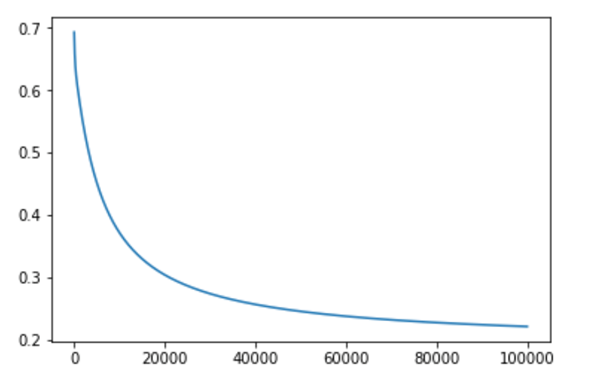

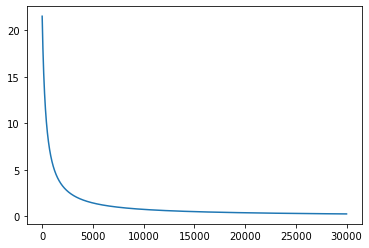

In [327]:
plt.plot(list1)

e) Plot points of the first exam score vs the second exam score. Admitted student points should be green and failed student points should be red. (same as Visualization part). And plot the decision boundary using the parameters found by gradient descent on the same graph. It should look similar to this:
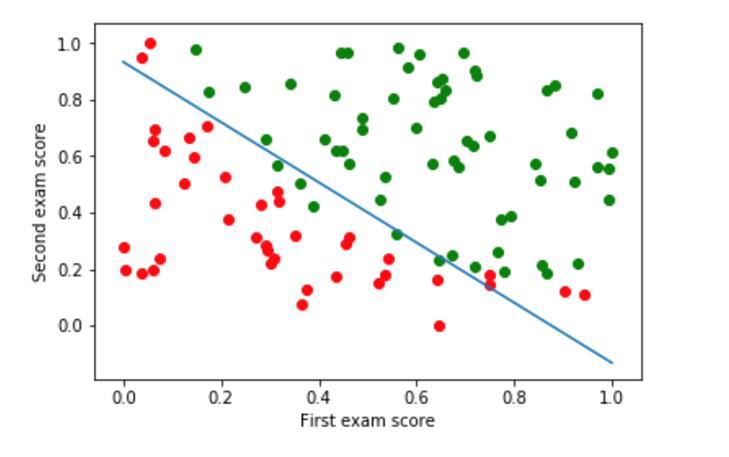

In [ ]:
plot_x = [np.min(x[:,1]-2), np.max(x[:,2]+2)]
plot_y = -1/theta_optimized[2]*(theta_optimized[0] 
          + np.dot(theta_optimized[1],plot_x))  
mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [ ]:
# sensivity - recall 
# specifity - precision 

f) Make predictions of the training data using your trained model, compare predicted labels with actuals label and print the score indicating how well your model performs. You can use accuracy_score function from scikit-learn library. After doing that, check if your model makes correct predictions for these data: {55, 70, 1} and {40, 60, 0}.

# 4. Logistic Regression using library

#### Use a library to perform logistic regression on the data. You should use the same features as input to this model and perform the same testing (3(f)) as above (using scikit-learn library is recommended).